# Applied Project

1. Ingest code
2. Preprocess/Clean code
3. Create features
4. EDA
5. Analyze POS
6. Sentiment analysis
7. Other EA attempts that did not work out

### import packages 



In [1]:
#packages for collab #I ended up running locally so these should be commented out
'''from google.colab import drive
drive.mount('/content/drive')
from google.colab import files'''

#standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk 
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
import sys
import os
import re

#download nltk libraries
nltk.download('punkt', quiet=True)
nltk.download('stopwords',quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('averaged_perceptron_tagger',quiet=True)
nltk.download('vader_lexicon',quiet=True)

True

### Ingest code

In [2]:
#used for in google colab to handle files in the data ingest stage

"""
def read_in_txt(folder_path):
  '''
    From folder path return imported txt files to file list
  '''
  file_contents = list()
  i=1
  for filename in os.listdir(folder_path):
    #print(filename)
    id = filename.split('.')[0]
    if '_lem' not in filename:
      filepath = os.path.join(folder_path, filename)
      with open(filepath, 'r') as f:
        content = f.read()
        file_contents.append([id,content])

  return file_contents


#import poems from ECPA

folder_path = '/content/drive/MyDrive/Colab Notebooks/CDS321/ECPA_works'

contents = read_in_txt(folder_path)

#remove poem title from begining of ECPA txt files then save strings to list

pattern = r"(.*?)\n(.*)"
ECPA_split = list()
for poem in contents:
  split = re.match(r"(.*?)\n(.*)", poem[1], re.DOTALL)
  firstline = split.group(1)
  secondline = split.group(2)
  ECPA_split.append([poem[0],firstline, secondline])

#get authors
ECPA_works_df = pd.DataFrame(ECPA_split, columns=['id','Title','Text'])

file_path = '/content/drive/MyDrive/Colab Notebooks/CDS321/ECPA_Author.csv'

ECPA_Author_df = pd.read_csv(file_path)

#add authors to ECPA_df
ECPA_df = pd.merge(ECPA_works_df, ECPA_Author_df, on='id')
ECPA_df = ECPA_df.drop(columns=['Title','author_id']) #remove unused columns

#download ECPA_df to csv to save time on next run
ECPA_df.to_csv('ECPA_df.csv', index=False)
files.download('my_dataframe.csv')"""

'\ndef read_in_txt(folder_path):\n  \'\'\'\n    From folder path return imported txt files to file list\n  \'\'\'\n  file_contents = list()\n  i=1\n  for filename in os.listdir(folder_path):\n    #print(filename)\n    id = filename.split(\'.\')[0]\n    if \'_lem\' not in filename:\n      filepath = os.path.join(folder_path, filename)\n      with open(filepath, \'r\') as f:\n        content = f.read()\n        file_contents.append([id,content])\n\n  return file_contents\n\n\n#import poems from ECPA\n\nfolder_path = \'/content/drive/MyDrive/Colab Notebooks/CDS321/ECPA_works\'\n\ncontents = read_in_txt(folder_path)\n\n#remove poem title from begining of ECPA txt files then save strings to list\n\npattern = r"(.*?)\n(.*)"\nECPA_split = list()\nfor poem in contents:\n  split = re.match(r"(.*?)\n(.*)", poem[1], re.DOTALL)\n  firstline = split.group(1)\n  secondline = split.group(2)\n  ECPA_split.append([poem[0],firstline, secondline])\n\n#get authors\nECPA_works_df = pd.DataFrame(ECPA_split,

In [3]:
#import EC poems from CSV
file_path = '/Users/eric/Downloads/ECPA_df.csv' #change file path for running on other machines

#ingest csv containing eigtheenth century poems
ECPA_df = pd.read_csv(file_path)
ECPA_df

,id,Text,author_display,title
0,o3776-w0050,HOW thick the shades of evening close! \nHow p...,"Akenside, Mark",ODE V. Hymn to CHEARFULNESS. The Author Sick.
1,o5089-w0610,SHALL Pope sing his flames\n With quality dame...,"Delany, Patrick",A SONG. I.
2,bed98-w0170,"FADE thy leaves thou beauteous rose,\nIn those...","Day, Eliza",TO DELIA.
3,o3900-w0270,HERE from afar the finish'd Height\n Of Holine...,"Gambold, John",On CLEMENS ALEXANDRINUS'S Description of a Per...
4,o4986-w0100,ERE this can drown the tenderest husband's eye...,Anonymous,TO COLONEL R—S.
...,...,...,...,...
3480,pcm93-w0100,"BLOOMING Beauty, brilliant Wit,\n Shall with l...","Manners, Catherine Rebecca Grey, Lady",Virtue.
3481,bmb97-w0020,'OH! hide me from the sun! I loath the sight!...,"Betham, (Mary) Matilda",THE FRATERNAL DUEL.
3482,pse03-w0270,"Pardon, fair Nymph, I durst exert my Power,\n ...","Egerton, Sarah Fyge",On a Gentleman and his Wife visiting a Lady. H...
3483,bah18-w0250,"OF soul too high to act a dubious part,\n With...","Hunter, Anne",EPITAPH FOR MY FATHER.


In [4]:
#import modern poems from CSV
file_path = '/Users/eric/Downloads/PoetryFoundationData.csv' #change file path for running on other machines

PF_df = pd.read_csv(file_path) #import PF poems
PF_df = PF_df.drop(columns='Tags')

### Preprocessing-Clean poems 

In [5]:
#Check no missing text and titles

print(ECPA_df[['Text','title']].isna().sum())
print(PF_df[['Title','Poem']].isna().sum())

Text     0
title    0
dtype: int64
Title    0
Poem     0
dtype: int64


In [6]:
#remove non poem lines

def remove_pattern(text):
  '''removes lines if the are in all caps in the first 7 lines of a poem'''

  lines = text.splitlines()
  new_lines = list()

  for i, line in enumerate(lines):
    if i<7 and re.fullmatch(r"[A-Z\s!@#$%^&*()_+—{}\[\]:;<>,.?~\\/-]*$", line): #removes misc info lines
      continue
    else:
      new_lines.append(line)

  return '\n'.join(new_lines)

ECPA_df['Text'] = ECPA_df['Text'].apply(remove_pattern)

In [7]:
#Text to lower

ECPA_df['lower'] = ECPA_df['Text'].str.lower()
PF_df['lower'] = PF_df['Poem'].str.lower()

In [8]:
#Additional cleaning for ECPA to remove other non poem lines

def remove_esq(text):
  '''
    Removes all lines before esq
  '''
  match = re.search(r"(.*esq[^\n]*\n)(.*)", text, re.DOTALL) #removes lines that contian information pertaining to who the poem is writen for
  if match:
    return match.group(2) #return lines after the information pertaining to who the poem is writen for
  return text #if no match is found return the original text

ECPA_df['lower'] = ECPA_df['lower'].apply(remove_esq)

In [9]:
#Strip text in ECPA

def remove_non_char(text):
  '''
    Removes all non characters; handles exceptions if input is not a string
  '''
  if isinstance(text, str):
    #clean = re.sub(r"[^a-zA-Z0-9\n\s]", "", text).replace("\n", "").replace('\xa0', '')
    clean = re.sub(r"[^a-zA-Z0-9\s]", "", text).replace('\xa0', '') #handles characters in the poem that are not content
    return clean
  else:
    return text

ECPA_df['strip'] = ECPA_df['lower'].apply(remove_non_char)

In [10]:
#Strip text in PF

def remove_non_char_PF(text):
  '''
    Removes all non characters; handles exceptions if input is not a string
  '''
  if isinstance(text, str):
    clean = re.sub(r"[^a-zA-Z0-9\n\s]", "", text).replace("\r\r", "").replace('\n ','')
    clean = re.sub(r'\s{2,}', '\n', clean) #account for bad formating where large blocks of space are used as newlines
    clean = re.sub(r'(^\n|\n$)', '', clean) #gets rid of first and last \n if the occur at the begining or end of string
    return clean
  else:
    return text

PF_df['strip'] = PF_df['lower'].apply(remove_non_char_PF)

In [11]:
#Check number of unique char across poems

dfs = [ECPA_df, PF_df]

for i in range(2):
  unique_char = set(''.join(dfs[i]['strip']))
  print(f'There are {len(unique_char)} unique characters')
  print(f'The set of unique characters is {unique_char}')

There are 38 unique characters
The set of unique characters is {'3', 'y', '8', ' ', 'z', 'b', '2', 'c', 'j', 's', 'i', 'f', '\n', 'm', 'h', '1', 'a', 'q', '5', 'x', '7', '6', '0', '9', 'n', 'r', 'o', 'e', '4', 'l', 'p', 'v', 'w', 't', 'k', 'g', 'd', 'u'}
There are 44 unique characters
The set of unique characters is {'3', '\u2002', 'y', '8', ' ', 'z', 'b', '2', 'c', 'j', 's', 'i', 'f', '\r', '\n', 'm', '\u2006', 'h', '\u2028', '1', 'a', 'q', '5', '\u200a', 'x', '7', '0', '6', '9', 'n', 'r', 'o', 'e', '4', 'l', 'p', '\u2009', 'v', 't', 'w', 'k', 'g', 'd', 'u'}


In [12]:
#Find poems with weird char/strings
rows_with_oddChar = PF_df[PF_df['strip'].str.contains('\u2029')]

print(rows_with_oddChar['strip'])

PF_df['strip'].iloc[633]

Series([], Name: strip, dtype: object)


'a skeletons mouth makes few concessions to prettiness\njacques joubert\nbecause your mouth is violet and you cannot speak\nbecause maybe i like thursdays the way i used to hate baths and\nbaths are boundaries whose sharpness will be blurred with more information\nbecause movement itself is a form of currency\nfrozen in articulations\nbecause dont indulge yourself in the idea of restraint\nthe blackened patches could have been pubic hair on dead bodies or simply\nthe wildness of neglect\nwithout horizons or spaces\nbecause its a comfort to know waste is the fuel of contradictions\na knife rusted before its first use\nbecause in the barest of rooms nothing is comprehensible\nneither fanatic nor mystic\nbecause the first weeks of september came and went and the weather held\nnot woven by innocent hands\nbecause this stasis is preparation\nbecause youre deceased maimed or in philadelphia'

In [13]:
#find and remove oddities

weird_PF = ['\u2002','\r','\u2028','\u2003','\u2009','\u2006','\u2029','\u200a','\t']
PF_df['strip'] = PF_df['strip'].apply(lambda x: ''.join([char for char in x if char not in weird_PF]))

In [14]:
#Check number of unique char across poems

dfs = [ECPA_df, PF_df]

for i in range(2):
  unique_char = set(''.join(dfs[i]['strip']))
  print(f'There are {len(unique_char)} unique characters')
  print(f'The set of unique characters is {unique_char}')

There are 38 unique characters
The set of unique characters is {'3', 'y', '8', ' ', 'z', 'b', '2', 'c', 'j', 's', 'i', 'f', '\n', 'm', 'h', '1', 'a', 'q', '5', 'x', '7', '6', '0', '9', 'n', 'r', 'o', 'e', '4', 'l', 'p', 'v', 'w', 't', 'k', 'g', 'd', 'u'}
There are 38 unique characters
The set of unique characters is {'3', 'y', '8', ' ', 'z', 'b', '2', 'c', 'j', 's', 'i', 'f', '\n', 'm', 'h', '1', 'a', 'q', '5', 'x', '7', '0', '6', '9', 'n', 'r', 'o', 'e', '4', 'l', 'p', 'v', 't', 'w', 'k', 'g', 'd', 'u'}


In [15]:
#Remove all roman numerals
def remove_roman_numerals(text):
  '''
    Removes all roman numerals; handles extra lines create by removing the numeral
  '''
  #roman_numeral_pattern = r'\b(?:I{1,3}|IV|VI{0,3}|IX|X{1,3}|XL|L{0,3}|XC|C{1,3}|CD|D{0,3}|CM|M{1,3})\.?\b'
  roman_numeral_pattern = r'\b[IVXLCDMivxlcdmn]+\.?\b' #Numeral pattern
  return re.sub(roman_numeral_pattern, '', text).replace('\n\n', '') #account for new lines that are now blank after the numeral is removed

ECPA_df['strip'] = ECPA_df['strip'].apply(remove_roman_numerals)

In [16]:
#Implement poem lines to list of lines

def lines_to_list(text):
  '''
    Gets a string and seperates the poem's lines to a list of lines
  '''
  lines = text.split('\n') #split string to a list of lines
  return lines

#Implement lines to list for ECPA_df and PF_df
ECPA_df['lines'] = ECPA_df['strip'].apply(lines_to_list)
PF_df['lines'] = PF_df['strip'].apply(lines_to_list)

In [17]:
# Stem + Lemmatize words, then tag POS using NLTK.pos_tag()

#prepare stemer and lemmatizer function
def stem_and_lemmatize(text):
    '''
    Recieves text and applies the porter stemmer and lemmatizes the stemmed text

    inpt (str): text input

    returns (tuple): stemed and lemmatized text
    '''
    
    stmr = PorterStemmer()
    lmtzr = WordNetLemmatizer()

    tokens = nltk.tokenize.word_tokenize(text)

    stmd_tokens = [stmr.stem(token) for token in tokens]
    lmtzd_tokens = [lmtzr.lemmatize(token) for token in stmd_tokens]

    return ' '.join(stmd_tokens), ' '.join(lmtzd_tokens)


#prepare function to apply stm + lmtzr
def apply_stm_lmtzr(df, text_col, stm_col='stemmed', lmtzd_col = 'lemmatized'):
    '''
    Applies the stem_and_lemmatize function to the text_col to a dataframe 

    inpts:
    df (df): dataframe you wish to stem and lemmatize
    text_col (str): name of the column containing the text to stem and lemmatize

    returns: df with stemmed and lemmatized columns
    '''

    stmd_res, lmtzd_res = zip(*df[text_col].apply(stem_and_lemmatize))

    df[stm_col] = list(stmd_res)
    df[lmtzd_col] = list(lmtzd_res)

    return df

#Apply Porter stemmer and lemmatize both DFs

ECPA_df = apply_stm_lmtzr(ECPA_df, 'strip')
PF_df = apply_stm_lmtzr(PF_df, 'strip')

In [18]:
#prep tagging function
def apply_pos_tag(text):
    '''
    Recieves text and applies POS tagging

    inpt (str): text input

    returns (list): text with POS tags
    '''

    tokens = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)

    return(pos_tags)


#POS tagging the two dfs
ECPA_df['tagged'] = ECPA_df['lemmatized'].apply(apply_pos_tag)
PF_df['tagged'] = PF_df['lemmatized'].apply(apply_pos_tag)

In [19]:
#find the number of tokens per poem
ECPA_df['num_tokens'] = ECPA_df['tagged'].apply(lambda tokens: len(tokens))
PF_df['num_tokens'] = PF_df['tagged'].apply(lambda tokens: len(tokens))

In [20]:
#Remove all empty poem rows in ECPA

ECPA_df[ECPA_df['num_tokens'] <= 10] # no empty lines in ECPA

,id,Text,author_display,title,lower,strip,lines,stemmed,lemmatized,tagged,num_tokens


In [21]:
#Remove all empty poem rows in PF

PF_df[PF_df['num_tokens'] <= 6] # a token length of 7 seems to be the magic number to remove the shortest poems

PF_df = PF_df[PF_df['num_tokens'] > 6]
PF_df = PF_df[PF_df['Poet'] != 'Wendy Videlock'] # this poet's poems seemingly did not get scraped properly

In [22]:
#Check data after removing non-poem entries 
ECPA_df

,id,Text,author_display,title,lower,strip,lines,stemmed,lemmatized,tagged,num_tokens
0,o3776-w0050,HOW thick the shades of evening close! \nHow p...,"Akenside, Mark",ODE V. Hymn to CHEARFULNESS. The Author Sick.,how thick the shades of evening close! \nhow p...,how thick the shades of evening close \nhow pa...,"[how thick the shades of evening close , how p...",how thick the shade of even close how pale the...,how thick the shade of even close how pale the...,"[(how, WRB), (thick, JJ), (the, DT), (shade, N...",968
1,o5089-w0610,SHALL Pope sing his flames\n With quality dame...,"Delany, Patrick",A SONG. I.,shall pope sing his flames\n with quality dame...,shall pope sing his flames\n with quality dame...,"[shall pope sing his flames, with quality dam...",shall pope sing hi flame with qualiti dame and...,shall pope sing hi flame with qualiti dame and...,"[(shall, MD), (pope, VB), (sing, VBG), (hi, JJ...",476
2,bed98-w0170,"FADE thy leaves thou beauteous rose,\nIn those...","Day, Eliza",TO DELIA.,"fade thy leaves thou beauteous rose,\nin those...",fade thy leaves thou beauteous rose\n those sw...,"[fade thy leaves thou beauteous rose, those s...",fade thi leav thou beauteou rose those sweet s...,fade thi leav thou beauteou rose those sweet s...,"[(fade, NN), (thi, NN), (leav, NN), (thou, NN)...",252
3,o3900-w0270,HERE from afar the finish'd Height\n Of Holine...,"Gambold, John",On CLEMENS ALEXANDRINUS'S Description of a Per...,here from afar the finish'd height\n of holine...,here from afar the finishd height\n of holines...,"[here from afar the finishd height, of holine...",here from afar the finishd height of holi is s...,here from afar the finishd height of holi is s...,"[(here, RB), (from, IN), (afar, VBG), (the, DT...",174
4,o4986-w0100,ERE this can drown the tenderest husband's eye...,Anonymous,TO COLONEL R—S.,ere this can drown the tenderest husband's eye...,ere this can drown the tenderest husbands eyes...,[ere this can drown the tenderest husbands eye...,ere thi can drown the tenderest husband eye an...,ere thi can drown the tenderest husband eye an...,"[(ere, RB), (thi, NN), (can, MD), (drown, VB),...",517
...,...,...,...,...,...,...,...,...,...,...,...
3480,pcm93-w0100,"BLOOMING Beauty, brilliant Wit,\n Shall with l...","Manners, Catherine Rebecca Grey, Lady",Virtue.,"blooming beauty, brilliant wit,\n shall with l...",blooming beauty brilliant wit\n shall with lif...,"[blooming beauty brilliant wit, shall with li...",bloom beauti brilliant wit shall with life sho...,bloom beauti brilliant wit shall with life sho...,"[(bloom, NN), (beauti, NN), (brilliant, NN), (...",124
3481,bmb97-w0020,'OH! hide me from the sun! I loath the sight!...,"Betham, (Mary) Matilda",THE FRATERNAL DUEL.,'oh! hide me from the sun! i loath the sight!...,oh hide me from the sun loath the sight \n c...,"[ oh hide me from the sun loath the sight , ...",oh hide me from the sun loath the sight can no...,oh hide me from the sun loath the sight can no...,"[(oh, UH), (hide, VB), (me, PRP), (from, IN), ...",854
3482,pse03-w0270,"Pardon, fair Nymph, I durst exert my Power,\n ...","Egerton, Sarah Fyge",On a Gentleman and his Wife visiting a Lady. H...,"pardon, fair nymph, i durst exert my power,\n ...",pardon fair nymph durst exert my power\n inva...,"[pardon fair nymph durst exert my power, inv...",pardon fair nymph durst exert my power invad y...,pardon fair nymph durst exert my power invad y...,"[(pardon, NN), (fair, JJ), (nymph, JJ), (durst...",154
3483,bah18-w0250,"OF soul too high to act a dubious part,\n With...","Hunter, Anne",EPITAPH FOR MY FATHER.,"of soul too high to act a dubious part,\n with...",of soul too high to act a dubious part\n with ...,"[of soul too high to act a dubious part, with...",of soul too high to act a dubiou part with mod...,of soul too high to act a dubiou part with mod...,"[(of, IN), (soul, NN), (too, RB), (high, JJ), ...",31


In [23]:
PF_df

,Unnamed: 0,Title,Poem,Poet,lower,strip,lines,stemmed,lemmatized,tagged,num_tokens
0,0,\r\r\n Objects Used to Prop...,"\r\r\nDog bone, stapler,\r\r\ncribbage board, ...",Michelle Menting,"\r\r\ndog bone, stapler,\r\r\ncribbage board, ...",dog bone stapler\ncribbage board garlic press\...,"[dog bone stapler, cribbage board garlic press...",dog bone stapler cribbag board garlic press be...,dog bone stapler cribbag board garlic press be...,"[(dog, NN), (bone, NN), (stapler, NN), (cribba...",86
1,1,\r\r\n The New Church\r\r\n...,"\r\r\nThe old cupola glinted above the clouds,...",Lucia Cherciu,"\r\r\nthe old cupola glinted above the clouds,...",the old cupola glinted above the clouds shone\...,[the old cupola glinted above the clouds shone...,the old cupola glint abov the cloud shone amon...,the old cupola glint abov the cloud shone amon...,"[(the, DT), (old, JJ), (cupola, NN), (glint, N...",122
2,2,\r\r\n Look for Me\r\r\n ...,\r\r\nLook for me under the hood\r\r\nof that ...,Ted Kooser,\r\r\nlook for me under the hood\r\r\nof that ...,look for me under the hood\nof that old chevro...,"[look for me under the hood, of that old chevr...",look for me under the hood of that old chevrol...,look for me under the hood of that old chevrol...,"[(look, NN), (for, IN), (me, PRP), (under, IN)...",74
3,3,\r\r\n Wild Life\r\r\n ...,"\r\r\nBehind the silo, the Mother Rabbit\r\r\n...",Grace Cavalieri,"\r\r\nbehind the silo, the mother rabbit\r\r\n...",behind the silo the mother rabbit\nhunches lik...,"[behind the silo the mother rabbit, hunches li...",behind the silo the mother rabbit hunch like a...,behind the silo the mother rabbit hunch like a...,"[(behind, IN), (the, DT), (silo, NN), (the, DT...",166
4,4,\r\r\n Umbrella\r\r\n ...,\r\r\nWhen I push your button\r\r\nyou fly off...,Connie Wanek,\r\r\nwhen i push your button\r\r\nyou fly off...,when i push your button\nyou fly off the handl...,"[when i push your button, you fly off the hand...",when i push your button you fli off the handl ...,when i push your button you fli off the handl ...,"[(when, WRB), (i, JJ), (push, VBP), (your, PRP...",116
...,...,...,...,...,...,...,...,...,...,...,...
13833,0,\r\r\n The Distances\r\r\n ...,\r\r\nThe accumulation of reefs\r\r\npiling up...,Jim Carroll,\r\r\nthe accumulation of reefs\r\r\npiling up...,the accumulation of reefs\npiling up one over ...,"[the accumulation of reefs, piling up one over...",the accumul of reef pile up one over the other...,the accumul of reef pile up one over the other...,"[(the, DT), (accumul, NN), (of, IN), (reef, NN...",488
13834,0,\r\r\n 0\r\r\n,\r\r\n Philosophic\r\r\nin its comple...,Hailey Leithauser,\r\r\n philosophic\r\r\nin its comple...,philosophic\nin its complex ovoid emptiness\na...,"[philosophic, in its complex ovoid emptiness, ...",philosoph in it complex ovoid empti a skill pu...,philosoph in it complex ovoid empti a skill pu...,"[(philosoph, NN), (in, IN), (it, PRP), (comple...",66
13848,12,\r\r\n 1 January 1965\r\r\n...,\r\r\nThe Wise Men will unlearn your name.\r\r...,Joseph Brodsky,\r\r\nthe wise men will unlearn your name.\r\r...,the wise men will unlearn your name\nabove you...,"[the wise men will unlearn your name, above yo...",the wise men will unlearn your name abov your ...,the wise men will unlearn your name abov your ...,"[(the, DT), (wise, NN), (men, NNS), (will, MD)...",150
13849,13,\r\r\n 1-800-FEAR\r\r\n ...,\r\r\nWe'd like to talk with you about ...,Jody Gladding,\r\r\nwe'd like to talk with you about ...,wed\nlike\nto\ntalk\nwith\nyou\nabout\nfear th...,"[wed, like, to, talk, with, you, about, fear t...",wed like to talk with you about fear they said...,wed like to talk with you about fear they said...,"[(wed, VBN), (like, IN), (to, TO), (talk, VB),...",113


### EDA

In [24]:
#find top n most common words in ECPA
ECPA_words = ' '.join(ECPA_df['strip']).split(' ') #get all words

stop_words = set(nltk.corpus.stopwords.words('english')) # stop words set 
ECPA_words = [word for word in ECPA_words if word not in stop_words] # remove stopwords

fdist = nltk.probability.FreqDist(ECPA_words) #create freq dist

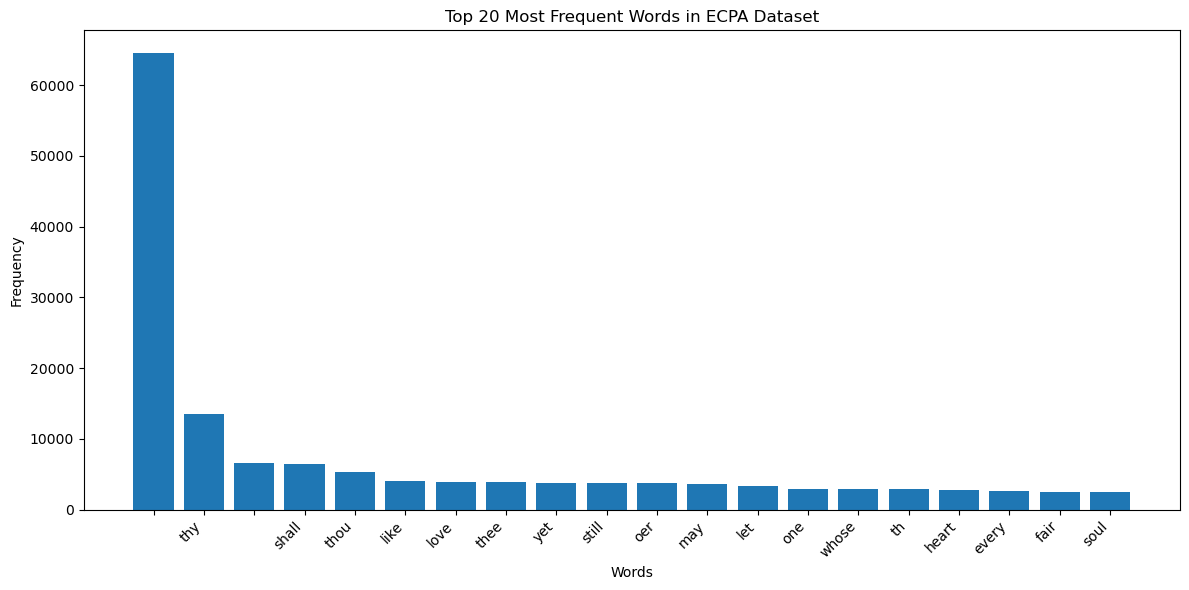

In [25]:
n_most_common = 20  # n most common words 
most_common = fdist.most_common(n_most_common)

word_frequencies = dict(most_common) # list to dict
plt.figure(figsize=(12, 6)) 
plt.bar(word_frequencies.keys(), word_frequencies.values())
plt.xticks(rotation=45, ha='right')  #rotate x-axis labels
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title(f"Top {n_most_common} Most Frequent Words in ECPA Dataset")
plt.tight_layout()
plt.show()

In [26]:
#find top n most common words in PF
PF_words = ' '.join(PF_df['strip']).split(' ') #get all words

stop_words = set(nltk.corpus.stopwords.words('english'))  # stop words set 
PF_words = [word for word in PF_words if word not in stop_words] # remove stopwords

fdist = nltk.probability.FreqDist(PF_words) #create freq dist

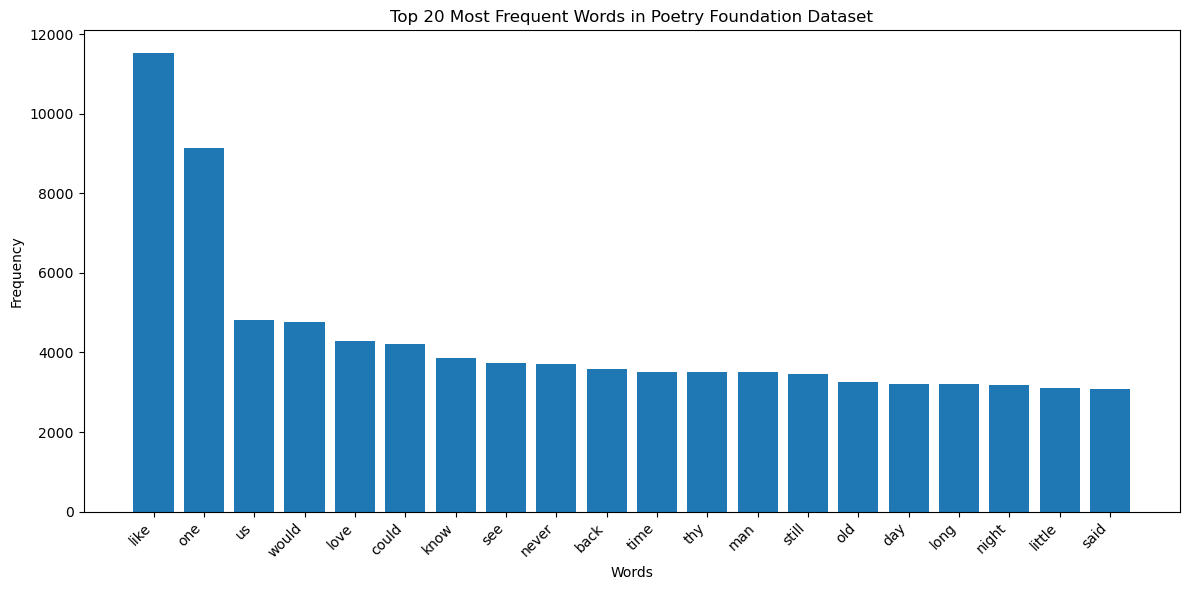

In [27]:
n_most_common = 20  #n most common
most_common = fdist.most_common(n_most_common)

word_frequencies = dict(most_common) 
plt.figure(figsize=(12, 6))  
plt.bar(word_frequencies.keys(), word_frequencies.values())
plt.xticks(rotation=45, ha='right')  
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title(f"Top {n_most_common} Most Frequent Words in Poetry Foundation Dataset")
plt.tight_layout() 
plt.show()

### Comparing POS 

In [28]:
#Moved to preprocess section to handle empty rows

"""# Stem + Lemmatize words, then tag POS using NLTK.pos_tag()

#prepare stemer and lemmatizer function
def stem_and_lemmatize(text):
    '''
    Recieves text and applies the porter stemmer and lemmatizes the stemmed text

    inpt (str): text input

    returns (tuple): stemed and lemmatized text
    '''
    
    stmr = PorterStemmer()
    lmtzr = WordNetLemmatizer()

    tokens = nltk.tokenize.word_tokenize(text)

    stmd_tokens = [stmr.stem(token) for token in tokens]
    lmtzd_tokens = [lmtzr.lemmatize(token) for token in stmd_tokens]

    return ' '.join(stmd_tokens), ' '.join(lmtzd_tokens)


#prepare function to apply stm + lmtzr
def apply_stm_lmtzr(df, text_col, stm_col='stemmed', lmtzd_col = 'lemmatized'):
    '''
    Applies the stem_and_lemmatize function to the text_col to a dataframe 

    inpts:
    df (df): dataframe you wish to stem and lemmatize
    text_col (str): name of the column containing the text to stem and lemmatize

    returns: df with stemmed and lemmatized columns
    '''

    stmd_res, lmtzd_res = zip(*df[text_col].apply(stem_and_lemmatize))

    df[stm_col] = list(stmd_res)
    df[lmtzd_col] = list(lmtzd_res)

    return df

#Apply Porter stemmer and lemmatize both DFs

ECPA_df = apply_stm_lmtzr(ECPA_df, 'strip')
PF_df = apply_stm_lmtzr(PF_df, 'strip')"""

"# Stem + Lemmatize words, then tag POS using NLTK.pos_tag()\n\n#prepare stemer and lemmatizer function\ndef stem_and_lemmatize(text):\n    '''\n    Recieves text and applies the porter stemmer and lemmatizes the stemmed text\n\n    inpt (str): text input\n\n    returns (tuple): stemed and lemmatized text\n    '''\n    \n    stmr = PorterStemmer()\n    lmtzr = WordNetLemmatizer()\n\n    tokens = nltk.tokenize.word_tokenize(text)\n\n    stmd_tokens = [stmr.stem(token) for token in tokens]\n    lmtzd_tokens = [lmtzr.lemmatize(token) for token in stmd_tokens]\n\n    return ' '.join(stmd_tokens), ' '.join(lmtzd_tokens)\n\n\n#prepare function to apply stm + lmtzr\ndef apply_stm_lmtzr(df, text_col, stm_col='stemmed', lmtzd_col = 'lemmatized'):\n    '''\n    Applies the stem_and_lemmatize function to the text_col to a dataframe \n\n    inpts:\n    df (df): dataframe you wish to stem and lemmatize\n    text_col (str): name of the column containing the text to stem and lemmatize\n\n    returns:

In [29]:
#Moved to preprocess section to handle empty rows

"""#prep tagging function
def apply_pos_tag(text):
    '''
    Recieves text and applies POS tagging

    inpt (str): text input

    returns (list): text with POS tags
    '''

    tokens = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)

    return(pos_tags)


#POS tagging the two dfs
ECPA_df['tagged'] = ECPA_df['lemmatized'].apply(apply_pos_tag)
PF_df['tagged'] = PF_df['lemmatized'].apply(apply_pos_tag)"""

"#prep tagging function\ndef apply_pos_tag(text):\n    '''\n    Recieves text and applies POS tagging\n\n    inpt (str): text input\n\n    returns (list): text with POS tags\n    '''\n\n    tokens = nltk.word_tokenize(text)\n    pos_tags = nltk.pos_tag(tokens)\n\n    return(pos_tags)\n\n\n#POS tagging the two dfs\nECPA_df['tagged'] = ECPA_df['lemmatized'].apply(apply_pos_tag)\nPF_df['tagged'] = PF_df['lemmatized'].apply(apply_pos_tag)"

In [30]:
def count_pos_tags(pos_tags):
    '''Counts the frequency of each part-of-speech tag'''
    tag_counts = Counter(tag for word, tag in pos_tags)
    return tag_counts

#Count tags for each dataframe
ECPA_df['pos_counts'] = ECPA_df['tagged'].apply(count_pos_tags)
PF_df['pos_counts'] = PF_df['tagged'].apply(count_pos_tags)

#Aggregate tag counts for the entire dataframe
def aggregate_pos_counts(df):
    '''Aggregates part-of-speech counts across all rows'''
    total_counts = Counter()
    for counts in df['pos_counts']:
        total_counts.update(counts)
    return total_counts

ECPA_total_counts = aggregate_pos_counts(ECPA_df)
PF_total_counts = aggregate_pos_counts(PF_df)

# Print the total counts
print("18th Century (ECPA) POS Counts:", ECPA_total_counts)
print("Modern (PF) POS Counts:", PF_total_counts)

18th Century (ECPA) POS Counts: Counter({'NN': 742859, 'JJ': 239766, 'DT': 209691, 'IN': 198610, 'VB': 122044, 'CC': 113535, 'RB': 75989, 'VBP': 70901, 'PRP': 66709, 'PRP$': 61562, 'TO': 51010, 'VBD': 50665, 'VBZ': 38795, 'MD': 31063, 'VBN': 21206, 'NNS': 20860, 'WRB': 19077, 'WP': 14923, 'WDT': 12862, 'JJS': 8550, 'JJR': 7344, 'CD': 6172, 'PDT': 5985, 'RP': 4208, 'RBR': 3971, 'VBG': 3571, 'WP$': 3220, 'EX': 2275, 'FW': 1672, 'RBS': 849, 'NNP': 370, 'UH': 220, '$': 28, 'POS': 8, "''": 8, 'SYM': 4, 'NNPS': 3, '``': 1})
Modern (PF) POS Counts: Counter({'NN': 1040779, 'IN': 403643, 'DT': 369594, 'JJ': 318532, 'VB': 166861, 'PRP': 158393, 'VBP': 137964, 'CC': 137795, 'RB': 123799, 'VBD': 82777, 'PRP$': 76140, 'TO': 71603, 'VBZ': 70148, 'VBN': 38915, 'MD': 37990, 'NNS': 29305, 'WRB': 24742, 'CD': 24192, 'WP': 22177, 'WDT': 17556, 'RP': 17020, 'JJR': 9852, 'JJS': 6665, 'EX': 6598, 'PDT': 6333, 'VBG': 5235, 'RBR': 4414, 'FW': 3395, 'WP$': 2146, 'RBS': 1064, 'NNP': 561, 'UH': 209, '$': 104, "'

In [31]:
def get_top_pos_percentages(counts, top_n=15):
    '''
    Gets the top N parts of speech and their percentages
    '''

    total_count = sum(counts.values()) # get sum
    percentages = {tag: count / total_count * 100 for tag, count in counts.items()} # change counts to pcts
    sorted_percentages = dict(sorted(percentages.items(), key=lambda item: item[1], reverse=True)) #sort dict keys by pct descending

    return dict(list(sorted_percentages.items())[:top_n])

ECPA_top_percentages = get_top_pos_percentages(ECPA_total_counts)
PF_top_percentages = get_top_pos_percentages(PF_total_counts)

print("Top 10 POS Percentages - 18th Century:", ECPA_top_percentages)
print("Top 10 POS Percentages - Modern:", PF_top_percentages)

Top 10 POS Percentages - 18th Century: {'NN': 33.60461886576682, 'JJ': 10.846264293721212, 'DT': 9.485765312907981, 'IN': 8.98449551385922, 'VB': 5.520889031234252, 'CC': 5.135968471708407, 'RB': 3.437504806417846, 'VBP': 3.2073395923071986, 'PRP': 3.017706617159432, 'PRP$': 2.784872427492077, 'TO': 2.307532934706001, 'VBD': 2.291926213230338, 'VBZ': 1.7549645207198452, 'MD': 1.405193012169624, 'VBN': 0.9592931467040867}
Top 10 POS Percentages - Modern: {'NN': 30.46289133443796, 'IN': 11.81435525400353, 'DT': 10.817764251450368, 'JJ': 9.323214344775588, 'VB': 4.883907641252996, 'PRP': 4.63605505792837, 'VBP': 4.038112164123602, 'CC': 4.033165649411526, 'RB': 3.6235122771617077, 'VBD': 2.422826321429209, 'PRP$': 2.22856585903838, 'TO': 2.0957709640757174, 'VBZ': 2.0531841066433447, 'VBN': 1.1390155030795712, 'MD': 1.111941384093355}


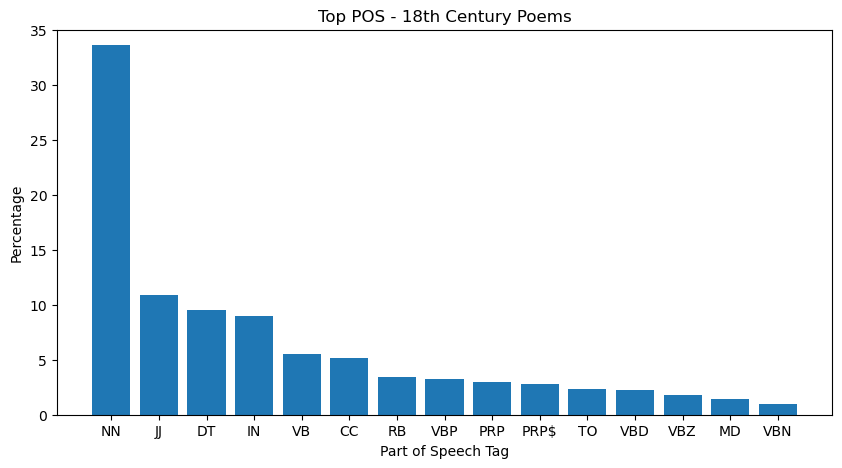

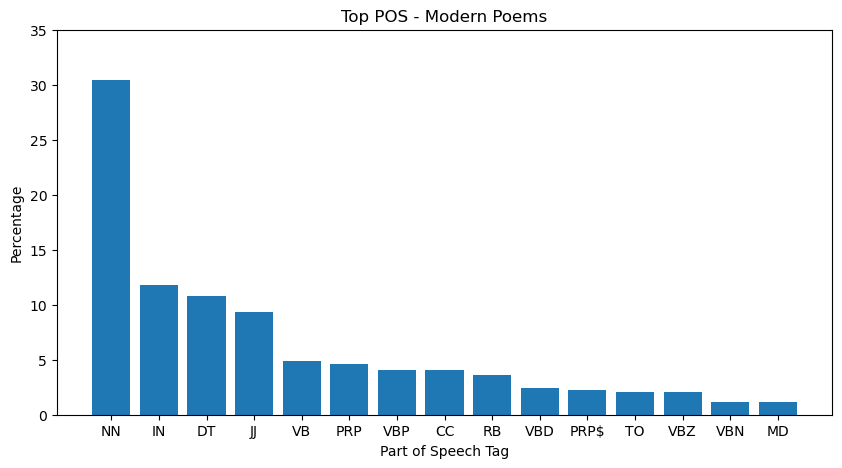

In [32]:
def plot_top_pos(pos_percentages, title):
    '''
    Plots the top parts of speech percentages
    '''
    
    tags = list(pos_percentages.keys())
    percentages = list(pos_percentages.values())

    plt.figure(figsize=(10, 5))
    plt.bar(tags, percentages)
    plt.xlabel("Part of Speech Tag")
    plt.ylim((0,35))
    plt.ylabel("Percentage")
    plt.title(title)
    plt.show()

plot_top_pos(ECPA_top_percentages, "Top POS - 18th Century Poems")
plot_top_pos(PF_top_percentages, "Top POS - Modern Poems")

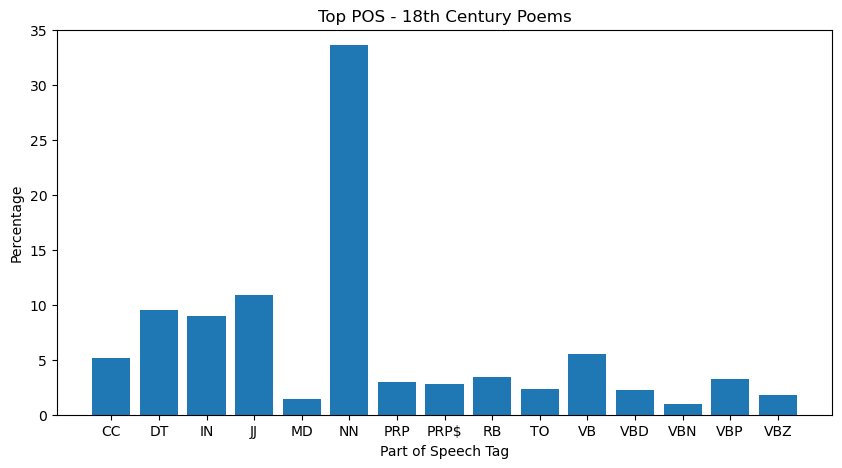

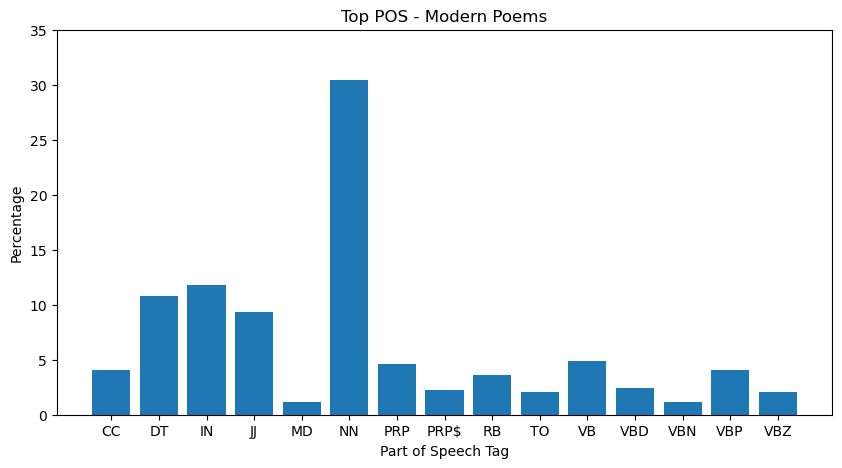

In [33]:
#plot sorted POS by POS in alpha order
plot_top_pos(dict(sorted(ECPA_top_percentages.items(), key=lambda item: item[0])), "Top POS - 18th Century Poems")
plot_top_pos(dict(sorted(PF_top_percentages.items(), key=lambda item: item[0])), "Top POS - Modern Poems")

In [34]:
def get_most_common_POS(df, pos_type, tagged_col='tagged', n=10):
    ''' 
    Finds the top n most common POS from a df and returns a list of the top n words

    inpt:
    df (dataframe): data frame contianing the POS tagged text
    pos_type (str): type of POS desired
    tagged_col (str): col of the tagged text
    n (int): top n most common POS

    returns:
    wrds (list): top n most common POS
    '''
    POS_found = []

    for index, row in df.iterrows():
        pos_tags = row[tagged_col]

        for word, tag in pos_tags:
                if tag.startswith(pos_type):
                    POS_found.append(word.lower())

    cnts = Counter(POS_found)
    most_common = cnts.most_common(n)

    return most_common

In [35]:
#ECPA POS
print('ECPA_nouns', get_most_common_POS(ECPA_df, 'NN'), 'tagged', 20)
print('ECPA_verbs', get_most_common_POS(ECPA_df, 'VB'), 'tagged', 20)
print('ECPA_adj', get_most_common_POS(ECPA_df, 'JJ'), 'tagged', 20)
print()

#PF POS
print('PF_nouns', get_most_common_POS(PF_df, 'NN'), 'tagged', 20)
print('PF_verbs', get_most_common_POS(PF_df, 'VB'), 'tagged', 20)
print('PF_adj', get_most_common_POS(PF_df, 'JJ'), 'tagged', 20)

ECPA_nouns [('hi', 15596), ('thi', 10532), ('eye', 5181), ('heart', 4706), ('love', 4100), ('day', 3956), ('soul', 3705), ('thou', 3633), ('man', 3381), ('life', 3315)] tagged 20
ECPA_verbs [('is', 10293), ('be', 7940), ('are', 5770), ('have', 3508), ('see', 3256), ('had', 3082), ('were', 2844), ('let', 2809), ('hi', 2646), ('thi', 2634)] tagged 20
ECPA_adj [('hi', 7312), ('thi', 7081), ('more', 2913), ('great', 2790), ('fair', 2490), ('such', 2452), ('own', 2038), ('good', 1832), ('soft', 1830), ('other', 1661)] tagged 20

PF_nouns [('i', 32939), ('hi', 11470), ('thi', 8683), ('day', 6056), ('time', 5769), ('eye', 5453), ('wa', 5396), ('hand', 5253), ('night', 4976), ('man', 4853)] tagged 20
PF_verbs [('is', 29479), ('be', 15035), ('are', 12334), ('have', 11013), ('wa', 9872), ('i', 7418), ('were', 7326), ('had', 6628), ('know', 5815), ('say', 5722)] tagged 20
PF_adj [('i', 12278), ('hi', 6397), ('thi', 6131), ('other', 4455), ('u', 3811), ('old', 3718), ('white', 3295), ('black', 290

In [36]:
def calc_POS_proportions(tagged_tokens):
    '''
    Gets a list of tokens and returns a dictionary of the proportions of Nouns, Verbs, and ADJ
    '''
    total_tokens = len(tagged_tokens)#find total num of tokens
    pos_counts = Counter()#initialize a counter object to count N,V,ADJ

    for token, tag in tagged_tokens:  
        if tag.startswith('N'):  #Noun tags starts with n
            pos_counts['Noun'] += 1
        elif tag.startswith('V'):  #verb tags starts with v
            pos_counts['Verb'] += 1
        elif tag.startswith('J'):  #adjective tags startswith j
            pos_counts['Adjective'] += 1

    proportions = {} #store proportions as a dict

    for pos, count in pos_counts.items():
        proportions[pos] = count / total_tokens #store values as proportions

    return proportions

In [37]:
ECPA_tokens = ECPA_df['tagged'].to_list()
ECPA_tokens = sum(ECPA_tokens, []) #set to a single list

#calc proportions for ECPA
ECPA_props = calc_POS_proportions(ECPA_tokens)
print(ECPA_props)

{'Adjective': 0.11565259166573931, 'Noun': 0.34565133408064647, 'Verb': 0.13895953380687293}


In [38]:
PF_tokens = PF_df['tagged'].to_list()
PF_tokens = sum(PF_tokens, []) #set to a single list

#calc proportions for PF
PF_props = calc_POS_proportions(PF_tokens)
print(PF_props)

{'Noun': 0.31337195127126893, 'Adjective': 0.09806655667257029, 'Verb': 0.14690270615331796}


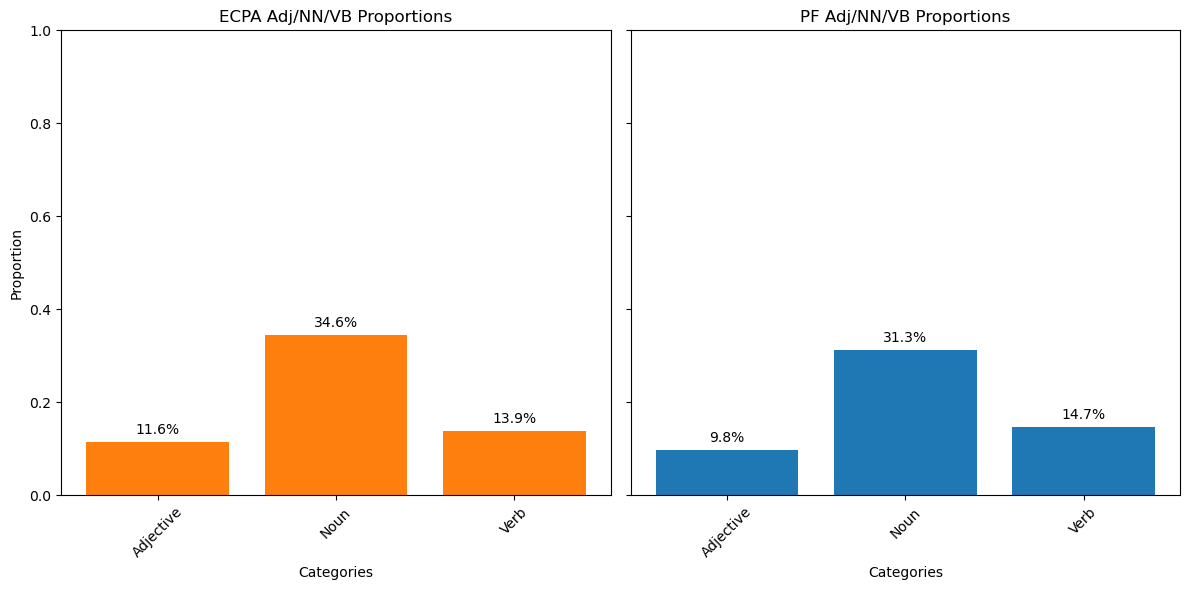

In [39]:
#fix key order in dicts
PF_keys = sorted(PF_props.keys())
PF_props = {key: PF_props[key] for key in PF_keys}

#Plot dists
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6),sharey=True)

ax1.bar(ECPA_props.keys(), ECPA_props.values())
bars1 = ax1.bar(ECPA_props.keys(), ECPA_props.values())
ax1.set_title('ECPA Adj/NN/VB Proportions')
ax1.set_xlabel('Categories')
ax1.set_ylabel('Proportion')
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylim(0, 1.0)  #Set y-axis limit to 0-1 for proportions
#Add percentage labels to ECPA bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height:.1%}',
             ha='center', va='bottom')


bars2 = ax2.bar(PF_props.keys(), PF_props.values())
ax2.set_title('PF Adj/NN/VB Proportions')
ax2.set_xlabel('Categories')
ax2.tick_params(axis='x', rotation=45)
ax2.set_ylim(0, 1.0)  #Set y-axis limit to 0-1 for proportions
#Add percentage labels to PF bars
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height:.1%}',
             ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [40]:
#Add POS counts to dataframes
import ast

#define function for getting counts 
def count_pos(df, column='tagged'):
    '''
    gets a dataframe and adds columns containing counts of POS (adj, noun, verbs) from a specified col 

    inpts:
    df (dataframe): dataframe 
    column (str): column containing tagged tokens

    return: df containing the new columns
    '''
    #lists for POS counts
    adj_counts = []
    noun_counts = []
    verb_counts = []

    for ndx,row in df.iterrows():
        tagged_tokens = row[column] #tagged token per row
        tags = [tag for token, tag in tagged_tokens] #isolate tags

        #count POS
        adj_counts.append(sum(1 for tag in tags if tag.startswith('J')))
        noun_counts.append(sum(1 for tag in tags if tag.startswith('N')))
        verb_counts.append(sum(1 for tag in tags if tag.startswith('V')))
    
    #add new cols
    df['adjective_count'] = adj_counts
    df['noun_count'] = noun_counts
    df['verb_count'] = verb_counts
    return df

In [41]:
#apply count_pos
ECPA_df = count_pos(ECPA_df)
PF_df = count_pos(PF_df)

In [42]:
def analyze_line_positions(df):
    '''
    Gets the POS tag at the begining of a line and end of a line then returns a counter object of the counts for each POS
    
    '''
    line_starts = []
    line_ends = []
    for index, row in df.iterrows():
        lines = row['strip'].splitlines()  #split into lines
        for line in lines:
            if line.strip():  #avoid empty lines
                pos_tags = nltk.pos_tag(nltk.word_tokenize(line))
                if pos_tags:
                    line_starts.append(pos_tags[0][1])  #first word's tag
                    if len(pos_tags) > 1:
                        line_ends.append(pos_tags[-1][1]) #last word's tag
                    else:
                        line_ends.append(pos_tags[0][1]) #only one word

    start_counts = Counter(line_starts)
    end_counts = Counter(line_ends)
    return start_counts, end_counts

#find line starts and ends from ECPA and PF
ECPA_line_starts, ECPA_line_ends = analyze_line_positions(ECPA_df)
PF_line_starts, PF_line_ends = analyze_line_positions(PF_df)

#output
print("ECPA - Line Start POS Counts:", ECPA_line_starts.most_common(10))
print("ECPA - Line End POS Counts:", ECPA_line_ends.most_common(10))
print("PF - Line Start POS Counts:", PF_line_starts.most_common(10))
print("PF - Line End POS Counts:", PF_line_ends.most_common(10))

ECPA - Line Start POS Counts: [('CC', 46979), ('IN', 38758), ('DT', 37640), ('NN', 35337), ('RB', 20229), ('JJ', 16300), ('VB', 11262), ('PRP$', 10557), ('NNS', 10394), ('TO', 9556)]
ECPA - Line End POS Counts: [('NN', 153544), ('NNS', 32281), ('VB', 25989), ('VBP', 17747), ('JJ', 14877), ('VBD', 9078), ('RB', 6732), ('VBN', 5063), ('IN', 4593), ('VBZ', 2674)]
PF - Line Start POS Counts: [('IN', 64641), ('NN', 59320), ('DT', 48978), ('CC', 32926), ('RB', 23650), ('PRP', 21552), ('NNS', 20065), ('JJ', 17850), ('VBG', 13074), ('PRP$', 11703)]
PF - Line End POS Counts: [('NN', 170689), ('NNS', 53234), ('JJ', 21873), ('VB', 19011), ('RB', 16802), ('PRP', 15056), ('IN', 13678), ('VBD', 13372), ('VBP', 11065), ('VBG', 8147)]


In [43]:
def get_proportion(counts):
    '''
    Converts Counter counts to proportions
    '''

    total_count = sum(counts.values()) # get sum of counts

    if total_count == 0:
        return {}
    proportions = {key: count / total_count for key, count in counts.items()} #changes counts to percentages
    return proportions

In [44]:
#Get the proportions of the top line start POS
ECPA_line_starts_proportions = get_proportion(ECPA_line_starts)
ECPA_line_ends_proportions = get_proportion(ECPA_line_ends)
PF_line_starts_proportions = get_proportion(PF_line_starts)
PF_line_ends_proportions = get_proportion(PF_line_ends)

#Output
print("ECPA - Line Start POS Proportions:", {k: f"{v:.4f}" for k, v in ECPA_line_starts_proportions.items()})
print("ECPA - Line End POS Proportions:", {k: f"{v:.4f}" for k, v in ECPA_line_ends_proportions.items()})
print("PF - Line Start POS Proportions:", {k: f"{v:.4f}" for k, v in PF_line_starts_proportions.items()})
print("PF - Line End POS Proportions:", {k: f"{v:.4f}" for k, v in PF_line_ends_proportions.items()})

ECPA - Line Start POS Proportions: {'WRB': '0.0334', 'NN': '0.1245', 'CC': '0.1655', 'NNS': '0.0366', 'TO': '0.0337', 'IN': '0.1366', 'VB': '0.0397', 'JJ': '0.0574', 'PRP$': '0.0372', 'DT': '0.1326', 'PRP': '0.0293', 'VBD': '0.0076', 'RB': '0.0713', 'WDT': '0.0087', 'JJS': '0.0015', 'VBZ': '0.0101', 'WP': '0.0186', 'MD': '0.0157', 'VBN': '0.0104', 'CD': '0.0034', 'VBG': '0.0128', 'WP$': '0.0048', 'RBR': '0.0016', 'PDT': '0.0007', 'VBP': '0.0028', 'EX': '0.0016', 'JJR': '0.0004', 'UH': '0.0013', 'RBS': '0.0001', 'LS': '0.0000', 'FW': '0.0000', 'RP': '0.0000'}
ECPA - Line End POS Proportions: {'JJ': '0.0524', 'NNS': '0.1137', 'NN': '0.5410', 'VB': '0.0916', 'IN': '0.0162', 'VBP': '0.0625', 'MD': '0.0029', 'DT': '0.0055', 'RB': '0.0237', 'VBD': '0.0320', 'VBZ': '0.0094', 'VBN': '0.0178', 'RP': '0.0039', 'JJS': '0.0030', 'JJR': '0.0027', 'VBG': '0.0037', 'CD': '0.0020', 'RBR': '0.0023', 'EX': '0.0010', 'PRP$': '0.0019', 'PRP': '0.0089', 'WRB': '0.0008', 'CC': '0.0004', 'RBS': '0.0003', 'WP

In [45]:
def analyze_pos_tag_sequences(df, n=2):
    '''
    Finds the top bigrams from a df when n = ngram and returns a counter item of bigrams
    '''
    all_pos_sequences = []
    for index, row in df.iterrows():
        pos_tags = [tag for word, tag in row['tagged']]
        pos_tag_n_grams = list(ngrams(pos_tags, n))
        all_pos_sequences.extend(pos_tag_n_grams)

    sequence_counts = Counter(all_pos_sequences)
    return sequence_counts

ECPA_pos_sequences = analyze_pos_tag_sequences(ECPA_df, n=2) # Analyze bigrams
PF_pos_sequences = analyze_pos_tag_sequences(PF_df, n=2)

print("ECPA - Top POS Tag Bigrams:", ECPA_pos_sequences.most_common(10))
print("PF - Top POS Tag Bigrams:", PF_pos_sequences.most_common(10))

ECPA - Top POS Tag Bigrams: [(('NN', 'NN'), 237859), (('JJ', 'NN'), 158382), (('DT', 'NN'), 136359), (('NN', 'IN'), 128712), (('NN', 'CC'), 79933), (('IN', 'NN'), 63172), (('IN', 'DT'), 50356), (('DT', 'JJ'), 45074), (('PRP$', 'NN'), 43063), (('IN', 'JJ'), 39056)]
PF - Top POS Tag Bigrams: [(('NN', 'NN'), 289330), (('DT', 'NN'), 251773), (('NN', 'IN'), 243906), (('JJ', 'NN'), 196109), (('IN', 'DT'), 136681), (('IN', 'NN'), 110096), (('NN', 'CC'), 91379), (('DT', 'JJ'), 74834), (('PRP$', 'NN'), 55700), (('IN', 'JJ'), 51998)]


In [46]:
#Get proportions of top bigrams
ECPA_pos_sequences_proportions = get_proportion(ECPA_pos_sequences)
PF_pos_sequences_proportions = get_proportion(PF_pos_sequences)

#output
print("ECPA - Top POS Tag Bigram Proportions:", {k: f"{v:.4f}" for k, v in Counter(ECPA_pos_sequences_proportions).most_common(10)})
print("PF - Top POS Tag Bigram Proportions:", {k: f"{v:.4f}" for k, v in Counter(PF_pos_sequences_proportions).most_common(10)})

ECPA - Top POS Tag Bigram Proportions: {('NN', 'NN'): '0.1078', ('JJ', 'NN'): '0.0718', ('DT', 'NN'): '0.0618', ('NN', 'IN'): '0.0583', ('NN', 'CC'): '0.0362', ('IN', 'NN'): '0.0286', ('IN', 'DT'): '0.0228', ('DT', 'JJ'): '0.0204', ('PRP$', 'NN'): '0.0195', ('IN', 'JJ'): '0.0177'}
PF - Top POS Tag Bigram Proportions: {('NN', 'NN'): '0.0850', ('DT', 'NN'): '0.0740', ('NN', 'IN'): '0.0717', ('JJ', 'NN'): '0.0576', ('IN', 'DT'): '0.0402', ('IN', 'NN'): '0.0324', ('NN', 'CC'): '0.0269', ('DT', 'JJ'): '0.0220', ('PRP$', 'NN'): '0.0164', ('IN', 'JJ'): '0.0153'}


In [47]:
ECPA_pos_sequences_proportions_10 = dict(Counter(ECPA_pos_sequences_proportions).most_common(10)) #get top 10
PF_pos_sequences_proportions_10 = dict(Counter(PF_pos_sequences_proportions).most_common(10))

In [48]:
def plot_counts(C_obj, title, xlab='bigrams', ylab='Percentage'):
    '''
    Plots a dict(counter object)
    '''

    elements = [str(key) for key in C_obj.keys()]  # Convert keys to strings
    counts = list(C_obj.values())

    print(elements)
    print(counts)

    #create bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(elements, counts)
    plt.xticks(rotation=45)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    plt.show()

["('NN', 'NN')", "('JJ', 'NN')", "('DT', 'NN')", "('NN', 'IN')", "('NN', 'CC')", "('IN', 'NN')", "('IN', 'DT')", "('DT', 'JJ')", "('PRP$', 'NN')", "('IN', 'JJ')"]
[0.10776987550637691, 0.07176019584060721, 0.06178194835669052, 0.058317222456063404, 0.03621628552567372, 0.028622160925123045, 0.02281544886255772, 0.020422264318669604, 0.019511114353171877, 0.017695610667568]


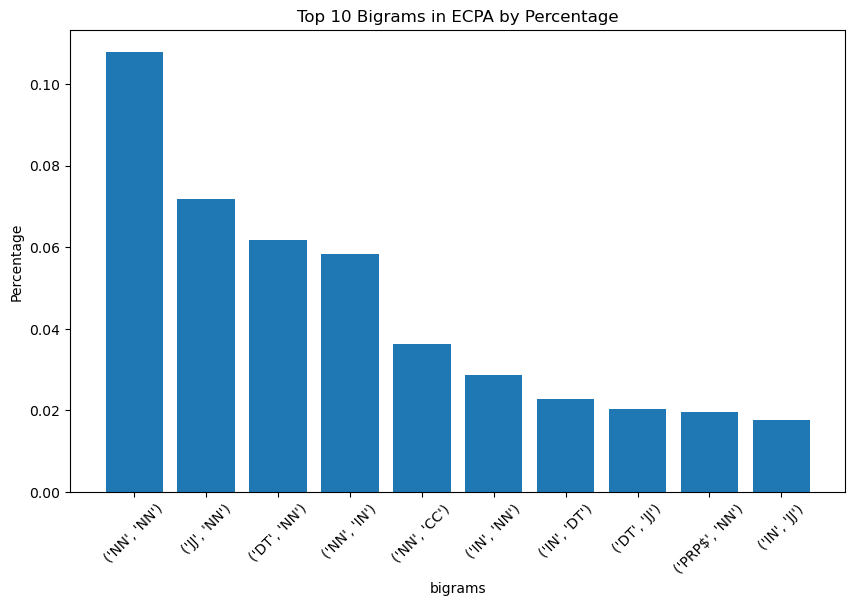

["('NN', 'NN')", "('DT', 'NN')", "('NN', 'IN')", "('JJ', 'NN')", "('IN', 'DT')", "('IN', 'NN')", "('NN', 'CC')", "('DT', 'JJ')", "('PRP$', 'NN')", "('IN', 'JJ')"]
[0.08502583718109066, 0.07398890576364268, 0.07167701877956348, 0.05763084334063702, 0.04016664864254883, 0.03235407517467721, 0.026853682562371285, 0.021991578818683643, 0.01636864179651868, 0.015280729553597458]


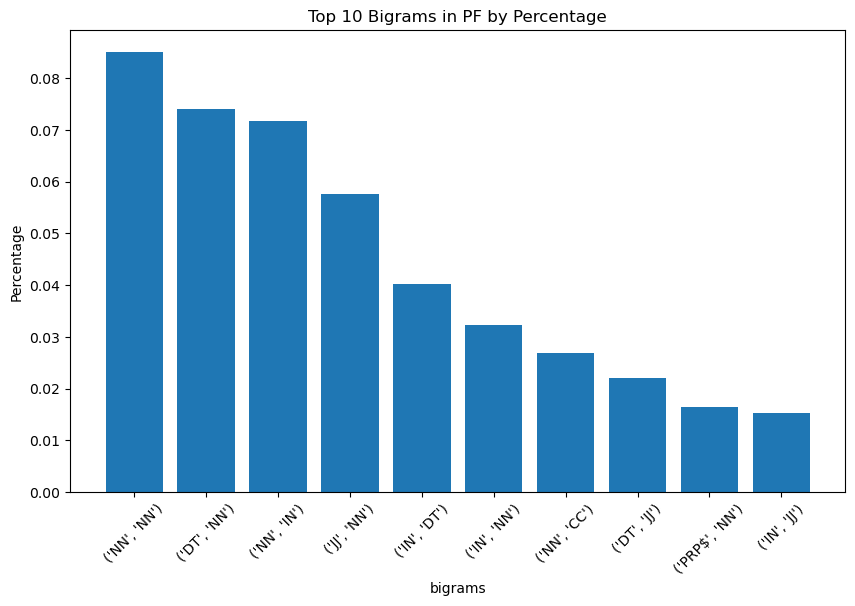

In [49]:
#plot the percentages of the top 10 bigrams
plot_counts(ECPA_pos_sequences_proportions_10, 'Top 10 Bigrams in ECPA by Percentage')
plot_counts(PF_pos_sequences_proportions_10, 'Top 10 Bigrams in PF by Percentage')

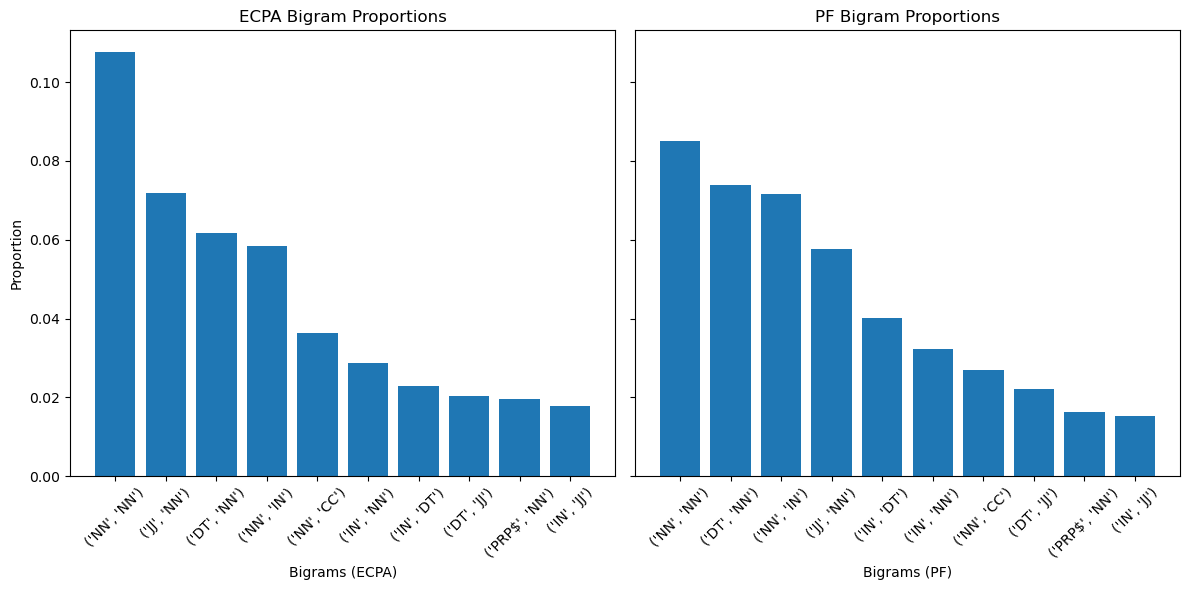

In [50]:
#plot ECPA and PF bigram proportions (top 10) in as subplots

fig,(ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6),sharey=True)
ax1.bar([str(key) for key in ECPA_pos_sequences_proportions_10.keys()], list(ECPA_pos_sequences_proportions_10.values()))
ax2.bar([str(key) for key in PF_pos_sequences_proportions_10.keys()], list(PF_pos_sequences_proportions_10.values()))
ax1.set_xlabel("Bigrams (ECPA)")
ax1.set_ylabel("Proportion")
ax1.set_title("ECPA Bigram Proportions")
ax1.tick_params(axis='x', rotation=45)

ax2.set_xlabel("Bigrams (PF)")
ax2.set_title("PF Bigram Proportions")
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Add basic stats on the dfs

In [51]:
#mean
print('The avg number of tokens in ECPA is ', ECPA_df['num_tokens'].mean())
print('The avg number of tokens in PF is ', PF_df['num_tokens'].mean())

#med
print('The median number of tokens in ECPA is ', ECPA_df['num_tokens'].median())
print('The median number of tokens in PF is ', PF_df['num_tokens'].median())

The avg number of tokens in ECPA is  634.3144906743186
The avg number of tokens in PF is  249.4011971676765
The median number of tokens in ECPA is  246.0
The median number of tokens in PF is  153.0


In [52]:
ECPA_df[['strip', 'num_tokens']]

,strip,num_tokens
0,how thick the shades of evening close \nhow pa...,968
1,shall pope sing his flames\n with quality dame...,476
2,fade thy leaves thou beauteous rose\n those sw...,252
3,here from afar the finishd height\n of holines...,174
4,ere this can drown the tenderest husbands eyes...,517
...,...,...
3480,blooming beauty brilliant wit\n shall with lif...,124
3481,oh hide me from the sun loath the sight \n c...,854
3482,pardon fair nymph durst exert my power\n inva...,154
3483,of soul too high to act a dubious part\n with ...,31


In [53]:
# analyze new feature
ECPA_df['num_tokens'].describe()

count     3485.000000
mean       634.314491
std       1460.401731
min         14.000000
25%        127.000000
50%        246.000000
75%        517.000000
max      19645.000000
Name: num_tokens, dtype: float64

In [54]:
PF_df['num_tokens'].describe()

count    13699.000000
mean       249.401197
std        436.862418
min          7.000000
25%         98.000000
50%        153.000000
75%        261.500000
max      15725.000000
Name: num_tokens, dtype: float64

In [55]:
PF_df[(PF_df['num_tokens'] < 2)].sort_values(by='num_tokens')

,Unnamed: 0,Title,Poem,Poet,lower,strip,lines,stemmed,lemmatized,tagged,num_tokens,pos_counts,adjective_count,noun_count,verb_count


In [56]:
PF_df[(PF_df['num_tokens'] > 7) & (PF_df['num_tokens'] < 20)].sort_values(by='num_tokens')
#there appears to be some empty entries, but that should not be a big deal as I am only interested in poems that exist

,Unnamed: 0,Title,Poem,Poet,lower,strip,lines,stemmed,lemmatized,tagged,num_tokens,pos_counts,adjective_count,noun_count,verb_count
7190,84,\r\r\n Epistles to Several ...,"\r\r\n\r\r\n\r\r\n\r\r\nEst brevitate opus, ut...",Alexander Pope,"\r\r\n\r\r\n\r\r\n\r\r\nest brevitate opus, ut...",est brevitate opus ut currat sententia neu se,[est brevitate opus ut currat sententia neu se],est brevit opu ut currat sententia neu se,est brevit opu ut currat sententia neu se,"[(est, JJS), (brevit, NN), (opu, NN), (ut, JJ)...",8,"{'JJS': 1, 'NN': 5, 'JJ': 1, 'FW': 1}",2,5,0
11970,126,\r\r\n The Mother’s Loathin...,"\r\r\nI hate you,How the children pleadAt ﬁrst...",A. E. Stallings,"\r\r\ni hate you,how the children pleadat ﬁrst...",i hate youhow the children pleadat rst sight,[i hate youhow the children pleadat rst sight],i hate youhow the children pleadat rst sight,i hate youhow the child pleadat rst sight,"[(i, JJ), (hate, VBP), (youhow, PDT), (the, DT...",8,"{'JJ': 1, 'VBP': 1, 'PDT': 1, 'DT': 1, 'NN': 4}",1,4,1
11973,129,\r\r\n “Unreal precision of...,\r\r\nUnreal precision of the houses at ﬁrst l...,Donald Revell,\r\r\nunreal precision of the houses at ﬁrst l...,unreal precision of the houses at rst light,[unreal precision of the houses at rst light],unreal precis of the hous at rst light,unreal precis of the hous at rst light,"[(unreal, JJ), (precis, NN), (of, IN), (the, D...",8,"{'JJ': 3, 'NN': 2, 'IN': 2, 'DT': 1}",3,2,0
8434,136,\r\r\n “On a branch ...”\r\...,\r\r\nOn a branch\r\r\nfloating downriver\r\r\...,Kobayashi Issa,\r\r\non a branch\r\r\nfloating downriver\r\r\...,on a branch\nfloating downriver\na cricket sin...,"[on a branch, floating downriver, a cricket si...",on a branch float downriv a cricket sing,on a branch float downriv a cricket sing,"[(on, IN), (a, DT), (branch, NN), (float, NN),...",8,"{'IN': 1, 'DT': 2, 'NN': 4, 'VBZ': 1}",0,4,1
12203,159,\r\r\n Lines on Marriage\r\...,\r\r\nYou’re not dewy withsleep in the next room,Joel Brouwer,\r\r\nyou’re not dewy withsleep in the next room,youre not dewy withsleep in the next room,[youre not dewy withsleep in the next room],your not dewi withsleep in the next room,your not dewi withsleep in the next room,"[(your, PRP$), (not, RB), (dewi, JJ), (withsle...",8,"{'PRP$': 1, 'RB': 1, 'JJ': 2, 'NN': 2, 'IN': 1...",2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10792,148,\r\r\n Merely a Poet\r\r\n ...,"\r\r\nTHAT ONE, is a poet for all poetsAH, the...",Edwin Torres,"\r\r\nthat one, is a poet for all poetsah, the...",that one is a poet for all poetsah then i woul...,[that one is a poet for all poetsah then i wou...,that one is a poet for all poetsah then i woul...,that one is a poet for all poetsah then i woul...,"[(that, DT), (one, CD), (is, VBZ), (a, DT), (p...",19,"{'DT': 5, 'CD': 1, 'VBZ': 1, 'NN': 4, 'IN': 2,...",0,4,3
2226,99,\r\r\n Touch Gallery: Joan ...,\r\r\nThe sculptures in this gallery have been...,Mary Szybist,\r\r\nthe sculptures in this gallery have been...,the sculptures in this gallery have been\ncare...,"[the sculptures in this gallery have been, car...",the sculptur in thi galleri have been care tre...,the sculptur in thi galleri have been care tre...,"[(the, DT), (sculptur, NN), (in, IN), (thi, NN...",19,"{'DT': 3, 'NN': 5, 'IN': 3, 'NNS': 1, 'VBP': 1...",2,6,3
2184,57,\r\r\n The Missing Portrait...,\r\r\nIt does not do you like it\r\r\nImperfec...,John Yau,\r\r\nit does not do you like it\r\r\nimperfec...,it does not do you like it\nimperfect copys fo...,"[it does not do you like it, imperfect copys f...",it doe not do you like it imperfect copi forge...,it doe not do you like it imperfect copi forge...,"[(it, PRP), (doe, VBZ), (not, RB), (do, VB), (...",19,"{'PRP': 4, 'VBZ': 2, 'RB': 1, 'VB': 1, 'IN': 1...",3,4,4
7800,97,\r\r\n Saying Farewell at t...,\r\r\nAt the last turn in the path\r\r\n ...,Gary Snyder,\r\r\nat the last turn in the path\r\r\n ...,at the last turn in the path\ngoodbye\nbending...,"[at the last turn in the path, g

[]

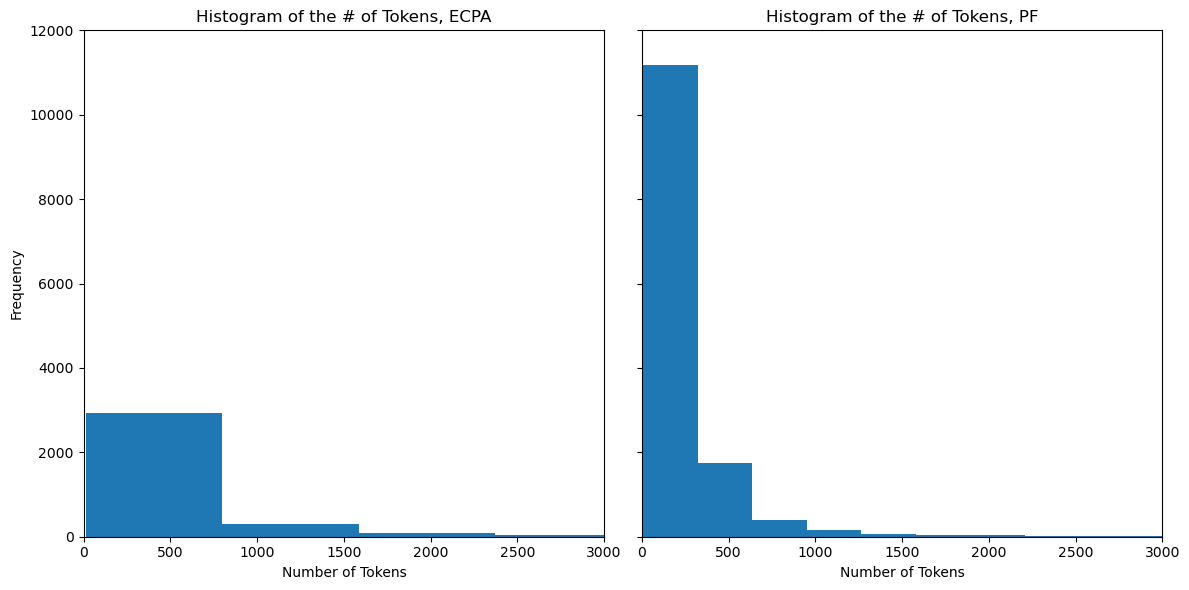

In [57]:
#plot the number of tokens for ECPA and PF
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,6), sharey=True)
ax1.hist(ECPA_df['num_tokens'],bins=25)
ax1.set_title('Histogram of the # of Tokens, ECPA')
ax1.set_xlabel('Number of Tokens')
ax1.set_ylabel('Frequency')
ax1.set_xlim(0,3000)
ax1.set_ylim(0,12000)
ax2.hist(PF_df['num_tokens'],bins=50)
ax2.set_title('Histogram of the # of Tokens, PF')
ax2.set_xlabel('Number of Tokens')
ax2.set_xlim(0,3000)
plt.tight_layout()
plt.plot()

[]

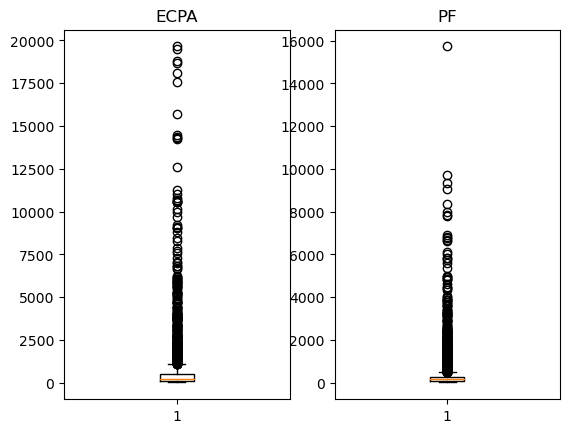

In [58]:
#plot the number of tokens
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.boxplot(ECPA_df['num_tokens'])
ax1.set_title('ECPA')
ax2.boxplot(PF_df['num_tokens'])
ax2.set_title('PF')
plt.plot()

In [59]:
#Avg word length from each dataframe

text = (''.join(ECPA_df['strip'])).split(' ') #get a list of all words

lens = np.array([len(word) for word in text]) #get a list of the lengths of each word

avg_len = np.mean(lens) #find the average length

print('The average word length in the ECPA df is ', avg_len)


text = (''.join(PF_df['strip'])).split(' ') #get a list of all words

lens = np.array([len(word) for word in text]) #get a list of the lengths of each word

avg_len = np.mean(lens) #find the average length

print('The average word length in the PF df is ', avg_len)

The average word length in the ECPA df is  4.634148364378557
The average word length in the PF df is  5.069773622261169


### Sentiment Analysis

In [60]:
#function for analyzing sentiment of ea poem
def analyze_poem_sentiment(poem):
    # get sentiment scores
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(poem)
    return sentiment_scores

#apply sentiment analysis 
def apply_sentiment_analysis(df,column='strip'):
    '''
    applies sentiment analysis to a df 

    inpts:
    df - dataframe
    column - col to apply sentiment analysis to
    '''
    # apply sentiment analysis 
    df['sentiment_scores'] = df[column].apply(analyze_poem_sentiment)

    #extract individual sentiment components into separate columns
    df['sentiment_neg'] = df['sentiment_scores'].apply(lambda x: x['neg'])
    df['sentiment_neu'] = df['sentiment_scores'].apply(lambda x: x['neu'])
    df['sentiment_pos'] = df['sentiment_scores'].apply(lambda x: x['pos'])
    df['sentiment_compound'] = df['sentiment_scores'].apply(lambda x: x['compound'])

    #convetert sentiment to categorical value
    df['sentiment_category'] = df['sentiment_compound'].apply(
    lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

    #view summary statistics of sentiment scores
    sentiment_stats = df[['sentiment_neg', 'sentiment_neu', 'sentiment_pos', 'sentiment_compound']].describe()
    print(sentiment_stats)

    #count poems by sentiment category
    sentiment_distribution = df['sentiment_category'].value_counts()
    print("\nSentiment Distribution:")
    print(sentiment_distribution)

In [61]:
#apply sentiment analysis
apply_sentiment_analysis(ECPA_df)
apply_sentiment_analysis(PF_df)

       sentiment_neg  sentiment_neu  sentiment_pos  sentiment_compound
count    3485.000000    3485.000000    3485.000000         3485.000000
mean        0.112154       0.688020       0.199848            0.608577
std         0.059461       0.081735       0.075748            0.679371
min         0.000000       0.399000       0.000000           -0.999900
25%         0.071000       0.633000       0.149000            0.651100
50%         0.108000       0.687000       0.196000            0.976500
75%         0.147000       0.744000       0.246000            0.995800
max         0.527000       1.000000       0.551000            1.000000

Sentiment Distribution:
positive    2841
negative     614
neutral       30
Name: sentiment_category, dtype: int64
       sentiment_neg  sentiment_neu  sentiment_pos  sentiment_compound
count   13699.000000   13699.000000   13699.000000        13699.000000
mean        0.083375       0.816609       0.100022            0.147503
std         0.056223       0.0860

In [62]:
#plot sentiment distributions 

ECPA_sentiment_cat = ECPA_df['sentiment_category'].to_list()
PF_sentiment_cat = PF_df['sentiment_category'].to_list()

def get_sent_proportions(sentiment_cat):
    '''
    gets a list of sentiment categories and finds the percentage of each, then returns labels and sentiment PCT for plotting a barchart

    inpt:
    sentiment_cat (stiring): string of labeled categories

    outputs:
    labels (list): list of labels
    values (string): list of pcts 
    '''
    #Get counts of sentiment
    counts = {'positive': sentiment_cat.count('positive'),
              'neutral': sentiment_cat.count('neutral'),
              'negative': sentiment_cat.count('negative')
    }

    #get total counts
    t_sentiments = len(sentiment_cat)

    #get percentages
    sentiment_percentages = {
    sentiment: (count / t_sentiments) * 100 for sentiment, count in counts.items()
    }

    return list(sentiment_percentages.keys()), list(sentiment_percentages.values())

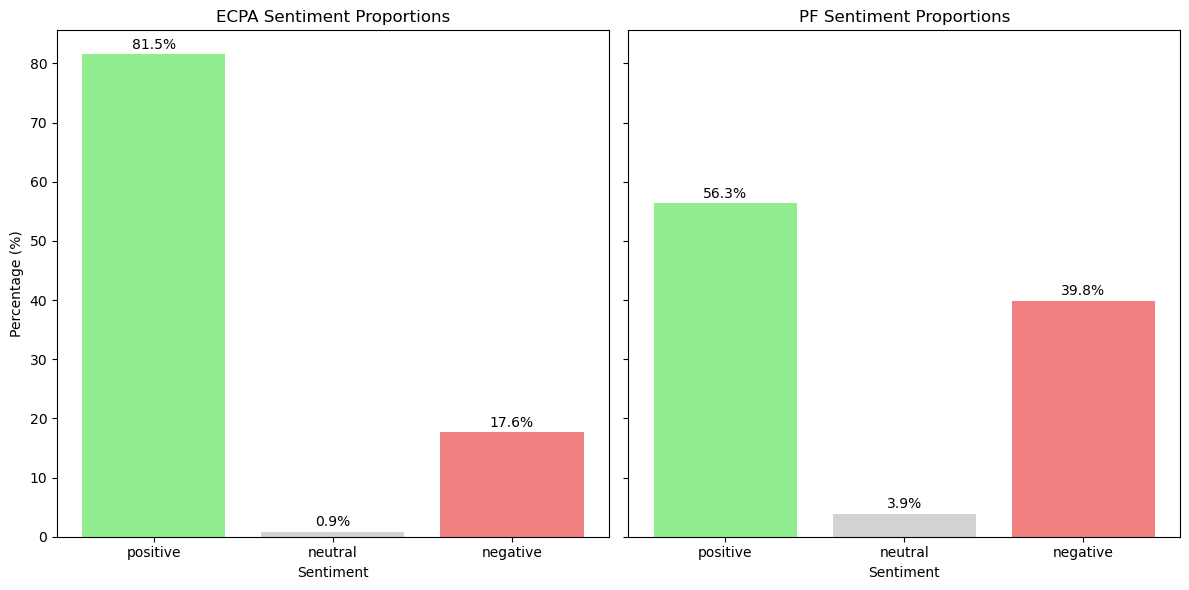

In [63]:
#get sentiment proportions
ECPA_sent_labels, ECPA_sent_pct = get_sent_proportions(ECPA_sentiment_cat)
PF_sent_labels, PF_sent_pct = get_sent_proportions(PF_sentiment_cat)

#colors for the sentiment categories
colors = ['lightgreen', 'lightgray', 'lightcoral']

#plot the subplots
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,6),sharey=True)
ax1.bar(ECPA_sent_labels, ECPA_sent_pct, color=colors)
ax1.set_title('ECPA Sentiment Proportions')
ax1.set_xlabel('Sentiment')
ax1.set_ylabel('Percentage (%)')
for i, v in enumerate(ECPA_sent_pct): #add pcts to the bars
    ax1.text(i, v + 1, f'{v:.1f}%', ha='center')

ax2.bar(PF_sent_labels, PF_sent_pct, color=colors)
ax2.set_title('PF Sentiment Proportions')
ax2.set_xlabel('Sentiment')
for i, v in enumerate(PF_sent_pct): #ass pcts to the bars
    ax2.text(i, v + 1, f'{v:.1f}%', ha='center')
plt.tight_layout()
plt.show()

In [64]:
#get POS counts by sentiment for ECPA
analysis_ECPA = ECPA_df.groupby('sentiment_category')[['adjective_count', 'noun_count', 'verb_count']].sum()
print("\nCounts of Adjectives, Nouns, and Verbs by Sentiment Category:")
print(analysis_ECPA)

#get POS counts by sentiment for PF
analysis_PF = PF_df.groupby('sentiment_category')[['adjective_count', 'noun_count', 'verb_count']].sum()
print("\nCounts of Adjectives, Nouns, and Verbs by Sentiment Category:")
print(analysis_PF)


Counts of Adjectives, Nouns, and Verbs by Sentiment Category:
                    adjective_count  noun_count  verb_count
sentiment_category                                         
negative                      32534      101592       41092
neutral                         579        1833         793
positive                     222547      660667      265297

Counts of Adjectives, Nouns, and Verbs by Sentiment Category:
                    adjective_count  noun_count  verb_count
sentiment_category                                         
negative                     125964      413447      190624
neutral                        4683       16262        7786
positive                     204402      640941      303490


In [65]:
#Plot PCT of POS tags by sentiment category 

#define function 

def plot_tags_by_sentiment(df, title):
    '''
    Plots POS tags: Adj, Nouns, and Verbs by the sentiment category of poems
    
    inpts:
    df (dataframe): dataframe to analyze
    title (str): title of the plot
    '''

    total_tokens_per_sentiment = df.groupby('sentiment_category')['num_tokens'].sum()

    #calculate the pct of each POS tag category
    percentage_analysis = df.groupby('sentiment_category')[['adjective_count', 'noun_count', 'verb_count']].sum()
    for sentiment in percentage_analysis.index:
        total = total_tokens_per_sentiment.loc[sentiment]
        if total > 0:
            percentage_analysis.loc[sentiment, 'adjective_count'] = (
            percentage_analysis.loc[sentiment, 'adjective_count'] / total) * 100
            percentage_analysis.loc[sentiment, 'noun_count'] = (
            percentage_analysis.loc[sentiment, 'noun_count'] / total) * 100
            percentage_analysis.loc[sentiment, 'verb_count'] = (
            percentage_analysis.loc[sentiment, 'verb_count'] / total) * 100
        else:
            percentage_analysis.loc[sentiment, :] = 0  #avoid division by 0

    sentiment_categories = percentage_analysis.index
    adjective_percentages = percentage_analysis['adjective_count'].values
    noun_percentages = percentage_analysis['noun_count'].values
    verb_percentages = percentage_analysis['verb_count'].values

    x = np.arange(len(sentiment_categories))  #label locations
    width = 0.25  #barplot par width

    fig, ax = plt.subplots(figsize=(10, 7))
    rects1 = ax.bar(x - width, adjective_percentages, width, label='Adjective', color='skyblue')
    rects2 = ax.bar(x, noun_percentages, width, label='Noun', color='lightcoral')
    rects3 = ax.bar(x + width, verb_percentages, width, label='Verb', color='lightgreen')

    #add text for labels, title and custom x-axis tick labels
    ax.set_ylabel('Percentage (%)')
    ax.set_xlabel('Sentiment Category')
    ax.set_title('Percentage of POS Tags by Sentiment Category '+ title)
    ax.set_xticks(x)
    ax.set_ylim((0,40))
    ax.set_xticklabels(sentiment_categories)
    ax.legend()

    def autolabel(rects):
        '''Attach a text label above each bar in *rects*, displaying its height.'''
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height:.1f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)

    fig.tight_layout()
    plt.grid(axis='y', linestyle='--')
    plt.show()

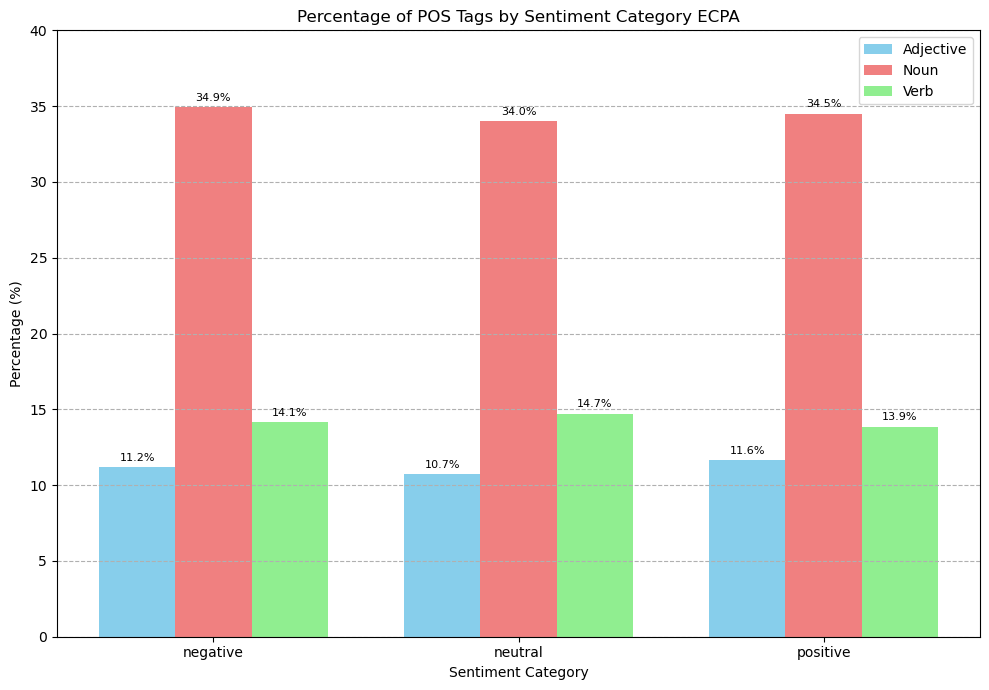

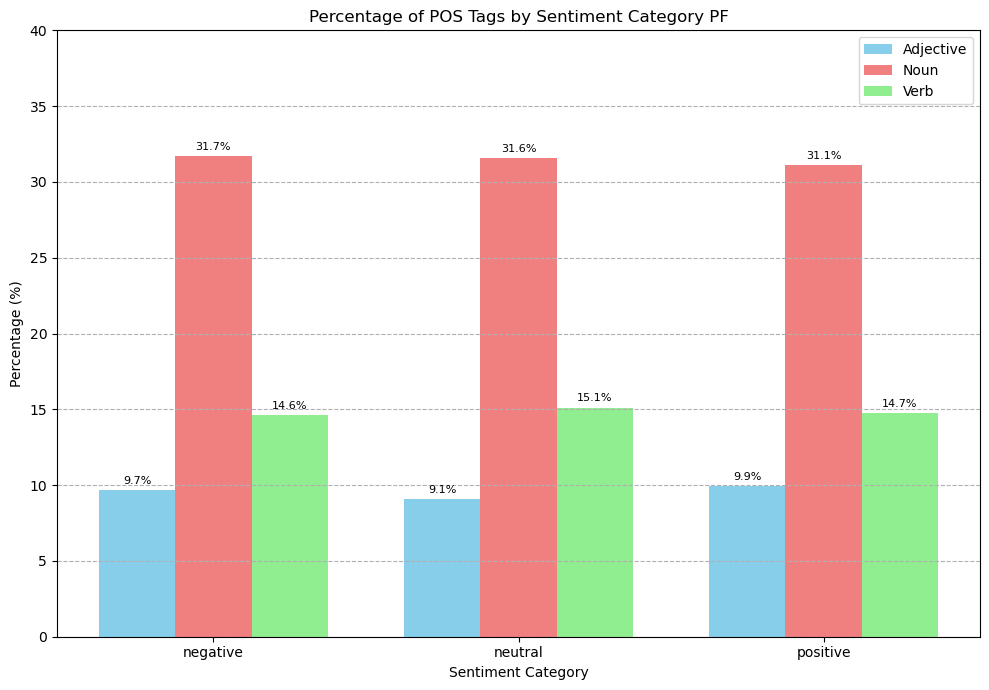

In [66]:
#plot tags by sentiment for ECPA and PF
plot_tags_by_sentiment(ECPA_df, 'ECPA')
plot_tags_by_sentiment(PF_df, 'PF')

## Other attempted NLP methods for analysis

### Metrical analysis 

%pip install rapidfuzz

In [67]:
#get packages

from nltk.corpus import cmudict
import jellyfish
from rapidfuzz import fuzz

In [68]:
#create function to count syllables

nltk.download('cmudict') #use cmu dict to use preannotated pronouncing dictionary
cmu_dict = cmudict.dict()

def count_syllables(word):
    '''
    counts the syllables in a word from the CMU pronouncing dictionary or use a simple rule based approach for words not in cmu_dict
    '''

    if word in cmu_dict:
        #get the number of syllables 
        return max([len(list(y for y in x if y[-1].isdigit())) for x in cmu_dict[word]])
    
    else: #handle words not in cmu_dict

        vowels = "aeiouy"
        count = 0 # vowels count
        
        if word[0] in vowels:
            count += 1
        for index in range(1, len(word)):
            if word[index] in vowels and word[index - 1] not in vowels:
                count += 1
        if word.endswith("e"):
            count -= 1
        if word.endswith("le"):
            count += 1
        return max(1, count) # Ensure at least one syllable

[nltk_data] Downloading package cmudict to /Users/eric/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


In [69]:
def analyze_syllables_per_line(lines):
    '''Analyze the number of syllables in each line of a poem.'''
    syllable_counts = []
    for line in lines:
        words = word_tokenize(line)
        line_syllable_count = sum(count_syllables(word) for word in words) #apply sylbl counter
        syllable_counts.append(line_syllable_count) #add to list
    return syllable_counts

In [70]:
#get counts for ECPA and PF
ECPA_df['syllable_counts'] = ECPA_df['lines'].apply(analyze_syllables_per_line)
print(ECPA_df[['strip', 'syllable_counts']])
PF_df['syllable_counts'] = PF_df['lines'].apply(analyze_syllables_per_line)
print(PF_df[['strip', 'syllable_counts']])

                                                  strip  \
0     how thick the shades of evening close \nhow pa...   
1     shall pope sing his flames\n with quality dame...   
2     fade thy leaves thou beauteous rose\n those sw...   
3     here from afar the finishd height\n of holines...   
4     ere this can drown the tenderest husbands eyes...   
...                                                 ...   
3480  blooming beauty brilliant wit\n shall with lif...   
3481   oh hide me from the sun  loath the sight \n c...   
3482  pardon fair nymph  durst exert my power\n inva...   
3483  of soul too high to act a dubious part\n with ...   
3484  amanda bids at her command again\n  seize the ...   

                                        syllable_counts  
0     [8, 8, 9, 9, 6, 8, 9, 8, 8, 8, 8, 15, 9, 9, 8,...  
1     [5, 5, 8, 6, 6, 9, 6, 6, 9, 4, 6, 15, 5, 8, 6,...  
2     [7, 7, 8, 7, 9, 9, 8, 17, 8, 8, 17, 8, 9, 14, ...  
3     [8, 6, 8, 6, 8, 6, 8, 14, 6, 9, 14, 5, 8, 13, ...  
4

In [121]:
ECPA_df['syllable_counts'].describe()

count             3485
unique            3464
top       [8, 8, 8, 8]
freq                 6
Name: syllable_counts, dtype: object

In [122]:
PF_df['syllable_counts'].describe()

count     13699
unique    12094
top       [143]
freq         33
Name: syllable_counts, dtype: object

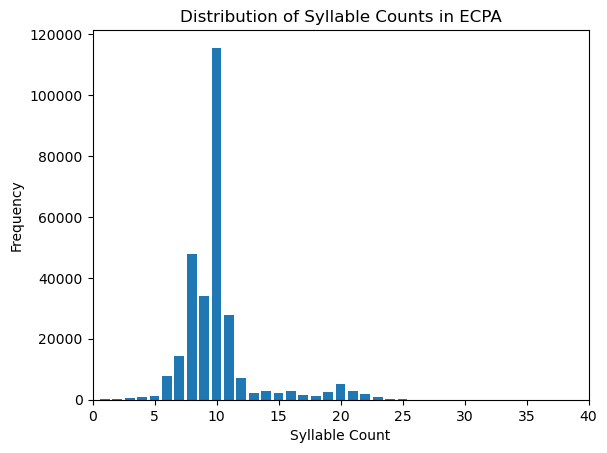

In [ ]:
ECPA_syl_list = sum(sum([], ECPA_df['syllable_counts'].to_list()),[]) #flaten lists
ECPA_syl_cnts = Counter(ECPA_syl_list)

plt.bar(ECPA_syl_cnts.keys(), ECPA_syl_cnts.values())
plt.xlabel("Syllable Count")
plt.xlim((0,50)) #the longest lines that I could think of from the data
plt.ylabel("Frequency")
plt.title("Distribution of Syllable Counts in ECPA")
plt.show()

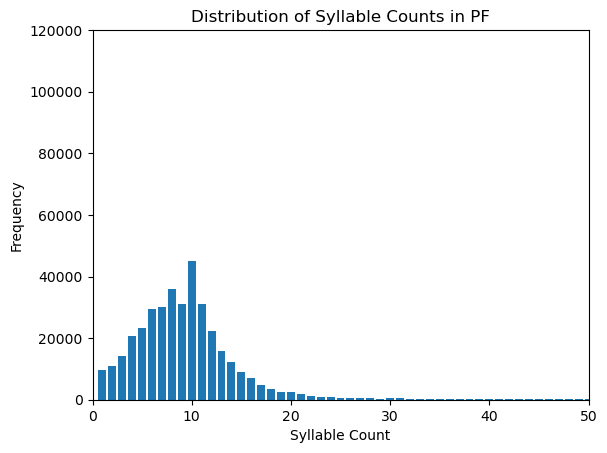

In [112]:
PF_syl_list = sum(sum([], PF_df['syllable_counts'].to_list()),[]) #flaten lists
PF_syl_cnts = Counter(PF_syl_list)

plt.bar(PF_syl_cnts.keys(), PF_syl_cnts.values())
plt.xlabel("Syllable Count")
plt.xlim((0,50)) #the longest lines that I could think of from the data
plt.ylim((0,120000))
plt.ylabel("Frequency")
plt.title("Distribution of Syllable Counts in PF")
plt.show()

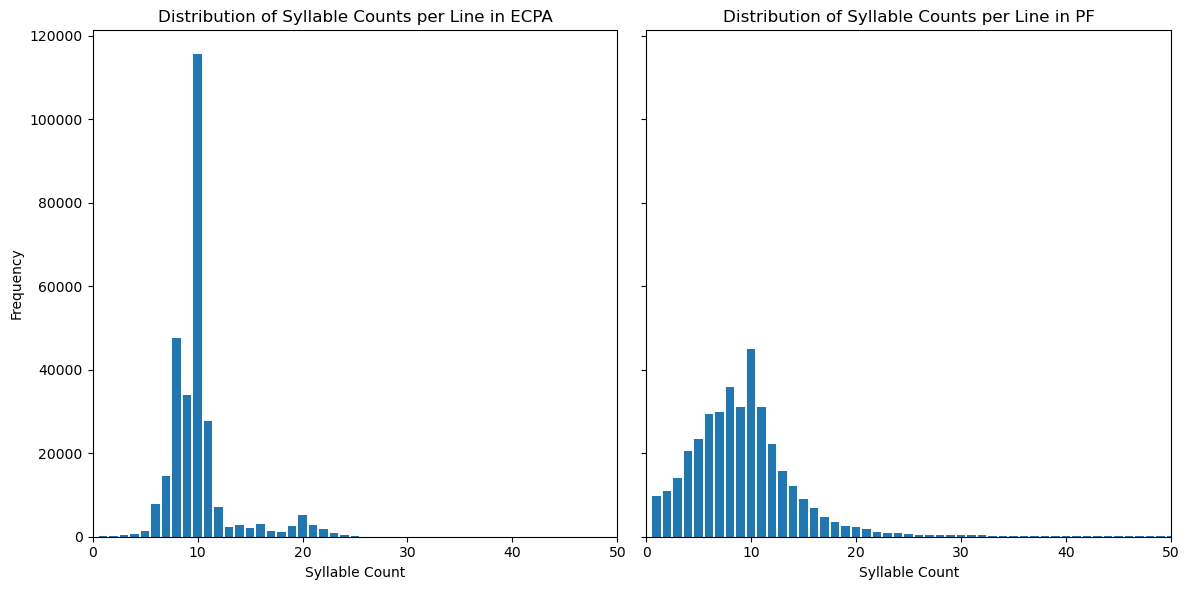

In [119]:
fig, (ax1,ax2) = plt.subplots(1,2, sharey=True, figsize=(12,6))
ax1.bar(ECPA_syl_cnts.keys(), ECPA_syl_cnts.values())
ax1.set_xlabel("Syllable Count")
ax1.set_xlim((0,50)) #the longest lines that I could think of from the data
ax1.set_ylabel("Frequency")
ax1.set_title("Distribution of Syllable Counts per Line in ECPA")

ax2.bar(PF_syl_cnts.keys(), PF_syl_cnts.values())
ax2.set_xlabel("Syllable Count")
ax2.set_xlim((0,50)) #the longest lines that I could think of from the data
ax2.set_title("Distribution of Syllable Counts per Line in PF")


plt.tight_layout()
plt.show()


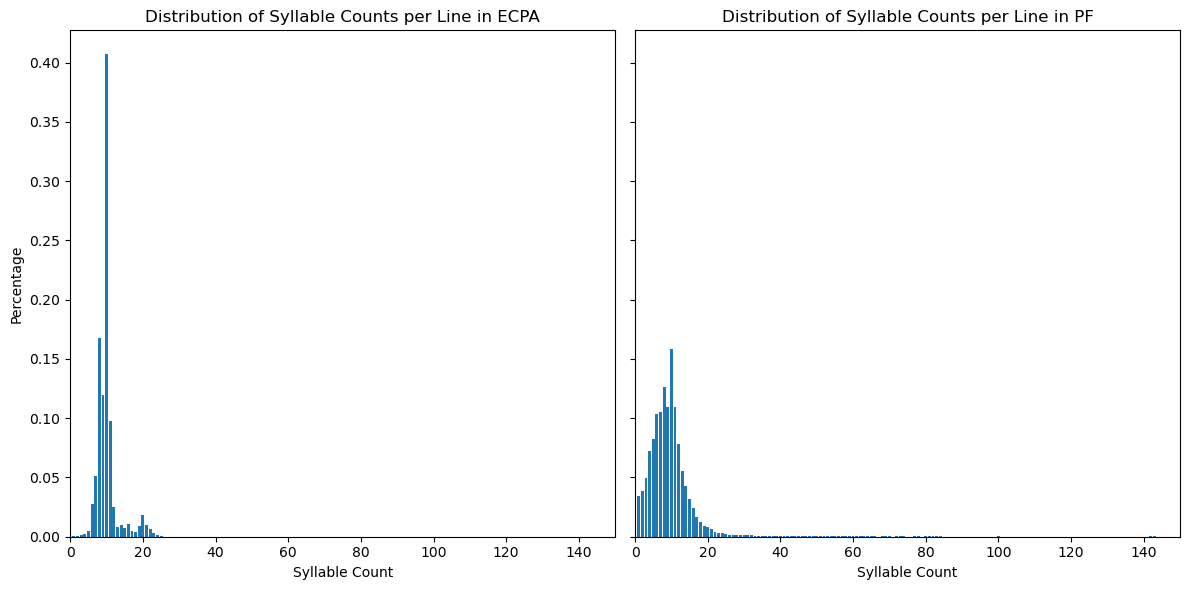

In [136]:
#view syl counts as a propoetion 
ECPA_line_cnt, PF_line_cnt = len(ECPA_syl_list), len(PF_syl_list) #get total num of lines to calculate a proporiton

fig, (ax1,ax2) = plt.subplots(1,2, sharey=True, figsize=(12,6))
ax1.bar(ECPA_syl_cnts.keys(), [x/ECPA_line_cnt for x in ECPA_syl_cnts.values()])
ax1.set_xlabel("Syllable Count")
#ax1.set_ylim((0,1))
ax1.set_xlim((0,150)) #the longest lines that I could think of from the data
ax1.set_ylabel("Percentage")
ax1.set_title("Distribution of Syllable Counts per Line in ECPA")

ax2.bar(PF_syl_cnts.keys(),  [x/ECPA_line_cnt for x in PF_syl_cnts.values()])
ax2.set_xlabel("Syllable Count")
ax2.set_xlim((0,150)) #the longest lines that I could think of from the data
ax2.set_title("Distribution of Syllable Counts per Line in PF")


plt.tight_layout()
plt.show()


### LDA - Did not yield good labels for topics even when adjusting params

#### LDA Method 1

In [72]:
# Get packages

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim import corpora, models

In [73]:
#Generate improved stopwords list
addtl_stop = ['oer', 'th', 'thy', 'thou','thee', 'ye', 'tho', 'tis', 'na', 'ah']
stop_words = set(stopwords.words('english')+addtl_stop)


#define function to filter out stopwords
def filter_stopwords(text):
    '''
    Gets a string of text and removes the stopwords

    Returns a filtered list of stirngs of text
    '''
    tokens = word_tokenize(text) #tokenize

    filtered = [wd for wd in tokens if wd not in stop_words] #filter out stopwords
    
    # return filtered list of strings
    return filtered

In [74]:
#Remove stopwods from ECPA_df and PF_df
ECPA_df['cleaned'] = ECPA_df['lemmatized'].apply(filter_stopwords)
PF_df['cleaned'] = PF_df['lemmatized'].apply(filter_stopwords)

In [75]:
#create DTM for the ECPA poems

dictionary_ECPA = corpora.Dictionary(ECPA_df['cleaned'])

#filter out rare words, and too common words
dictionary_ECPA.filter_extremes(no_below=50, no_above=0.55)

#create a bag of words or kitchen sink corpus
corpus_ECPA = [dictionary_ECPA.doc2bow(doc) for doc in ECPA_df['cleaned']]


#LDA model training time
n_topics = 5 #select nomber of topics to model

#train LDA Model 
lda_model_ECPA = models.LdaModel(corpus_ECPA, num_topics=n_topics, id2word=dictionary_ECPA, random_state=42)

#output topics
for topic_id, topic_words in lda_model_ECPA.print_topics(num_words=10):
    print(f"Topic {topic_id + 1}: {topic_words}")

Topic 1: 0.008*"wa" + 0.007*"shall" + 0.005*"eye" + 0.005*"soul" + 0.005*"like" + 0.004*"yet" + 0.004*"heart" + 0.004*"may" + 0.004*"one" + 0.003*"vain"
Topic 2: 0.006*"eye" + 0.006*"heart" + 0.006*"wa" + 0.005*"shall" + 0.004*"day" + 0.004*"man" + 0.004*"yet" + 0.004*"still" + 0.003*"like" + 0.003*"soul"
Topic 3: 0.005*"shall" + 0.005*"eye" + 0.004*"yet" + 0.004*"like" + 0.004*"still" + 0.004*"heart" + 0.004*"fair" + 0.004*"see" + 0.004*"art" + 0.004*"great"
Topic 4: 0.007*"shall" + 0.006*"wa" + 0.005*"let" + 0.004*"still" + 0.004*"heart" + 0.004*"joy" + 0.004*"hand" + 0.004*"day" + 0.004*"yet" + 0.004*"eye"
Topic 5: 0.007*"shall" + 0.006*"may" + 0.005*"yet" + 0.004*"still" + 0.004*"heart" + 0.004*"one" + 0.004*"see" + 0.004*"wa" + 0.004*"friend" + 0.004*"like"


In [76]:
#create DTM for the PF poems

dictionary_PF = corpora.Dictionary(PF_df['cleaned'])

#filter out rare words, and too common words
dictionary_PF.filter_extremes(no_below=50, no_above=0.55)

#create a bag of words or kitchen sink corpus
corpus_PF = [dictionary_PF.doc2bow(doc) for doc in PF_df['cleaned']]


#LDA model training time
n_topics = 5 #select nomber of topics to model

#train LDA Model 
lda_model_PF = models.LdaModel(corpus_PF, num_topics=n_topics, id2word=dictionary_PF, random_state=42)

#output topics
for topic_id, topic_words in lda_model_PF.print_topics(num_words=10):
    print(f"Topic {topic_id + 1}: {topic_words}")

Topic 1: 0.018*"hi" + 0.013*"wa" + 0.010*"like" + 0.009*"one" + 0.009*"thi" + 0.007*"say" + 0.006*"said" + 0.006*"would" + 0.006*"could" + 0.005*"know"
Topic 2: 0.012*"like" + 0.010*"one" + 0.008*"thi" + 0.005*"wa" + 0.005*"light" + 0.005*"world" + 0.004*"water" + 0.004*"u" + 0.004*"wind" + 0.004*"know"
Topic 3: 0.016*"wa" + 0.012*"one" + 0.011*"like" + 0.009*"thi" + 0.007*"know" + 0.007*"hi" + 0.007*"say" + 0.007*"want" + 0.006*"go" + 0.006*"back"
Topic 4: 0.019*"thi" + 0.017*"hi" + 0.010*"love" + 0.007*"wa" + 0.006*"shall" + 0.006*"one" + 0.005*"like" + 0.005*"heart" + 0.005*"yet" + 0.005*"day"
Topic 5: 0.017*"hi" + 0.017*"wa" + 0.012*"like" + 0.007*"thi" + 0.006*"eye" + 0.005*"night" + 0.005*"one" + 0.005*"come" + 0.005*"hand" + 0.004*"back"


#### LDA Method 2

In [77]:
#create function for LDA topic modeling

def LDA_topic_model (text, n_topics=5, n_top_words=10):
    '''
    Gets a list of text, then applies LDA to topic model

    inpts:
    text (list): list of poems (str)
    n_topics (int): num of topics
    n_top_words (int): selects how many top words displayed

    returns:
    lda model
    vectorizer
    
    '''


    cv = CountVectorizer(stop_words='english', max_df=0.70, min_df=0.1) #adjust max_df and min_df 
    poem_vectors = cv.fit_transform(text)

    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(poem_vectors)

    feature_names = cv.get_feature_names_out()
    for topic_idx, topic in enumerate(lda.components_):
        print(f"Topic {topic_idx + 1}:")
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(", ".join(top_words))
        print()

    return lda, cv, lda.components_

In [78]:
#apply LDA model2 to ECPA
samples = ECPA_df['cleaned'].apply(lambda word_list: ' '.join(word_list)) #combine list of strings to a string
sample_text = samples.to_list() #convert df object to list of strings

lda_model, vectorizer, topic_word_matrix = LDA_topic_model(sample_text) #apply LDA topic model


doc_topic_dist = lda_model.transform(vectorizer.transform(samples))  #get distributions
print(doc_topic_dist)

Topic 1:
hi, eye, everi, sweet, fair, thro, round, shade, day, light

Topic 2:
hi, shall, great, virtu, fame, prais, natur, let, art, powr

Topic 3:
hi, man, wa, like, make, ti, ha, good, day, god

Topic 4:
hi, wa, like, son, shall, eye, arm, love, said, king

Topic 5:
love, heart, shall, eye, soul, joy, charm, breast, tear, hope

[[4.51075221e-01 2.64189464e-01 6.35528943e-04 6.37521348e-04
  2.83462265e-01]
 [2.16099897e-01 1.90310268e-03 2.10977726e-01 8.13372560e-02
  4.89682018e-01]
 [3.18997742e-01 3.65731500e-01 2.74441925e-03 2.71987494e-03
  3.09806464e-01]
 ...
 [2.82763327e-01 5.88829509e-03 1.57894909e-01 5.88584962e-03
  5.47567620e-01]
 [1.84896200e-02 6.20532903e-01 1.84652097e-02 1.84235733e-02
  3.24088694e-01]
 [7.30604879e-01 1.01385975e-01 3.21429133e-02 1.35087596e-01
  7.78636219e-04]]


In [83]:
#apply LDA model2 to PF
samples_PF = PF_df['cleaned'].apply(lambda word_list: ' '.join(word_list)) #combine list of strings to a string
sample_PF_text = samples_PF.tolist() #create a list of text

In [84]:
#apply LDA model 
lda_model, vectorizer, topic_word_matrix = LDA_topic_model(sample_PF_text, 10)

doc_topic_dist = lda_model.transform(vectorizer.transform(samples_PF))
print(doc_topic_dist)

Topic 1:
thi, god, world, love, let, thing, life, earth, heart, beauti

Topic 2:
want, mother, hand, woman, child, face, look, bodi, onli, know

Topic 3:
love, heart, dream, like, eye, death, die, night, sleep, dead

Topic 4:
hi, man, like, hand, eye, ha, head, thi, old, men

Topic 5:
im, said, say, dont, black, white, want, like, look, tell

Topic 6:
light, like, water, dark, thi, white, night, blue, tree, sky

Topic 7:
time, day, come, know, new, ha, old, home, way, hous

Topic 8:
wa, hi, said, time, day, like, man, came, night, left

Topic 9:
like, say, know, think, feel, dont, becaus, thi, make, look

Topic 10:
wa, like, came, thought, littl, child, old, said, befor, word

[[0.38445299 0.00714433 0.00714358 ... 0.00714382 0.55839513 0.00714343]
 [0.00625061 0.00625115 0.00625122 ... 0.00625106 0.00625096 0.00625164]
 [0.00833486 0.00833527 0.00833475 ... 0.00833666 0.00833608 0.31950263]
 ...
 [0.26675237 0.00370417 0.70361192 ... 0.00370414 0.00370444 0.00370452]
 [0.00416888 0.00